# Livestock Lifelines: Analyzing Trends to Combat Food Insecurity in the Philippines

**Members:**
- Balangeg, Kyle
- Cruz, Dwight Kenneth
- De Lara, Aaron Charles
- Gaano, Rex Allaire
- Ng, Alyza Paige

In [1]:
import warnings
import tabulate

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pmdarima import auto_arima
from matplotlib.lines import Line2D
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

warnings.simplefilter(action='ignore')

### Initial Update:
- Added Data Exploration.

### To do list:
- Provide Analysis on each function done.
- Check the data cleaning part.
- Check and add more feature engineering.
- Add more Visualizations.
- Form the Model.

## Understanding the Dataset

The `2E4FINL0` dataset is utilized for this analysis.

### Dataset Description

The dataset records the livestock inventory in the Philippines, disaggregated by **animal type, farm type, region, province,** and **quarter** over the period from **1994 to 2022.**\
The inventory measures the actual number of animals present on farms, regardless of ownership, as of a specific reference date.

### Variables and Their Definitions

- **Animal Type:** Different kinds of poultry animals (e.g., chicken, swine, etc.).
- **Farm Type:** Whether the farm is a backyard or commercial farm.
- **Region and Province:** Geographical information on where the data was collected.
- **Quarter:** The reference quarter of the data (January, April, July, October).
- **Inventory (count):** The number of animals present (in heads).

### Purpose of the Data

The `2E4FINL0` dataset monitors the inventory levels of livestock across different regions and provinces in the Philippines. The dataset was obtained from the Philippine Statistics Authority (PSA) OpenSTAT website. Philippine Statistics Authority (PSA) is the government agency responsible for collecting and publishing this data, which is useful for planning in agriculture, economics, and food production. Hence, it provides insight into the distribution of livestock by farm type, geographical location, and time.

### Problem Statement

Food security remains an issue in the Philippines, with 44.7% of Filipinos experiencing food insecurity in 2023 (Author, Date). Livestock production, a critical component of the food supply chain, has an direct impact on the availability and affordability of meat and eggs, which are staple food sourced for Filipinos.

The analysis of livestock trends across different regions and farm types can provide insights into regional disparities in livestock production. Identifying regions that underperform or show declining trends in livestock numbers will help highlight areas where government intervention or infrastructure improvements are needed to mitigate the food insecurity for Filipinos.

### Objectives of the Analysis

Therefore, this analysis aims to:
1. Identify trends in livestock production across regions and provinces in the Philippines from 1994 to 2022.
2. Determine whether certain regions consistently have lower livestock inventory levels compared to others.
3. Assess the impact of farm types (backyard vs. commercial) on livestock production trends.
4. Provide recommendations for addressing regional disparities to improve Filipino food security.

## Part 1: Data Wrangling

### 1.1 Data Exploration

#### ➡️ Load the dataset into Pandas dataframe

In [2]:
df_livestock = pd.read_csv('2E4FINL0.csv', header=1)

#### ➡️ Inspect the data Part 1

In [3]:
# Checking the first entries. 

df_livestock.head(10)

,Animal Type,Farm Type,Geolocation,1994 01 January,1994 01 April,1994 01 July,1994 01 October,1995 01 January,1995 01 April,1995 01 July,...,2021 01 July,2021 01 October,2022 01 January,2022 01 April,2022 01 July,2022 01 October,2023 01 January,2023 01 April,2023 01 July,2023 01 October
0,Carabao,Backyard,PHILIPPINES,2555492,..,2664806,..,2702325,..,2832240,...,2837583,..,2769604,2766991,2762309,2781425,2766009,..,..,..
1,Carabao,Backyard,National Capital Region (NCR),..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
2,Carabao,Backyard,Cordillera Administrative Region (CAR),89882,..,97573,..,99245,..,115566,...,78747,..,77218,77605,78637,79207,78579,..,..,..
3,Carabao,Backyard,....Abra,24784,..,25952,..,26377,..,35461,...,16408,..,17475,18075,17996,18591,17800,..,..,..
4,Carabao,Backyard,....Apayao,..,..,..,..,..,..,..,...,17309,..,17856,17240,18175,18100,18045,..,..,..
5,Carabao,Backyard,....Benguet,7503,..,12105,..,15333,..,22250,...,11606,..,11427,11433,11445,11713,11546,..,..,..
6,Carabao,Backyard,....Ifugao,16626,..,17122,..,16802,..,17478,...,7649,..,5470,5270,5276,5280,5861,..,..,..
7,Carabao,Backyard,....Kalinga,27063,..,28844,..,27359,..,28431,...,20518,..,19585,20090,20170,19883,19657,..,..,..
8,Carabao,Backyard,....Mountain Province,13906,..,13550,..,13374,..,11946,...,5257,..,5405,5497,5575,5640,5670,..,..,..
9,Carabao,Backyard,Region I (Ilocos Region),155287,..,150434,..,161524,..,191648,...,178890,..,165745,160828,156611,153234,150936,..,..,..


In [4]:
# Checking the last entries. 

df_livestock.tail(10) 

,Animal Type,Farm Type,Geolocation,1994 01 January,1994 01 April,1994 01 July,1994 01 October,1995 01 January,1995 01 April,1995 01 July,...,2021 01 July,2021 01 October,2022 01 January,2022 01 April,2022 01 July,2022 01 October,2023 01 January,2023 01 April,2023 01 July,2023 01 October
798,Swine,Commercial,....Agusan del Sur,..,..,..,210,230,230,490,...,5670,5159,5051,3890,2591,884,464,..,..,..
799,Swine,Commercial,....Dinagat Islands,..,..,..,..,..,..,..,...,27,14,79,176,117,112,49,..,..,..
800,Swine,Commercial,....Surigao del Norte,192,225,159,160,150,150,160,...,436,519,7,17,..,..,..,..,..,..
801,Swine,Commercial,....Surigao del Sur,..,..,..,..,30,30,20,...,3122,3322,3741,52,18,14,11,..,..,..
802,Swine,Commercial,Bangsamoro Autonomous Region in Muslim Mindana...,125,125,275,180,210,120,120,...,..,..,..,..,..,..,..,..,..,..
803,Swine,Commercial,....Basilan,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
804,Swine,Commercial,....Lanao del Sur,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
805,Swine,Commercial,....Maguindanao,..,..,35,40,40,..,..,...,..,..,..,..,..,..,..,..,..,..
806,Swine,Commercial,....Sulu,125,125,240,140,120,120,120,...,..,..,..,..,..,..,..,..,..,..
807,Swine,Commercial,....Tawi-tawi,..,..,..,..,50,..,..,...,..,..,..,..,..,..,..,..,..,..


In [5]:
# Checking the number of rows and columns. 

# 808 Rows and 123 Columns
df_livestock.shape

(808, 123)

In [6]:
# Summary of Data.

df_livestock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Columns: 123 entries, Animal Type to 2023 01 October
dtypes: object(123)
memory usage: 776.6+ KB


In [7]:
# Describing Categorical Columns 

# All are initially considered as Categorial Variables.
# There is no Feature Engineering done here yet.
df_livestock.describe()

,Animal Type,Farm Type,Geolocation,1994 01 January,1994 01 April,1994 01 July,1994 01 October,1995 01 January,1995 01 April,1995 01 July,...,2021 01 July,2021 01 October,2022 01 January,2022 01 April,2022 01 July,2022 01 October,2023 01 January,2023 01 April,2023 01 July,2023 01 October
count,808,808,808,808,808,808,808,808,808,808,...,808,808,808,808,808,808,808,808,808,808
unique,4,2,101,590,162,618,171,609,170,615,...,677,193,629,619,616,616,609,1,1,1
top,Carabao,Backyard,PHILIPPINES,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
freq,202,404,8,184,645,161,637,147,635,160,...,96,614,146,146,151,149,150,808,808,808


In [8]:
# Describing Numerical Columns

# Turning Quarter Columns into numerical data.
df_livestock_copy = df_livestock.copy()

quarter_columns = df_livestock_copy.columns[3:]
df_livestock_copy[quarter_columns] = df_livestock_copy[quarter_columns].apply(pd.to_numeric, errors='coerce')

df_livestock_copy.describe()

,1994 01 January,1994 01 April,1994 01 July,1994 01 October,1995 01 January,1995 01 April,1995 01 July,1995 01 October,1996 01 January,1996 01 April,...,2021 01 July,2021 01 October,2022 01 January,2022 01 April,2022 01 July,2022 01 October,2023 01 January,2023 01 April,2023 01 July,2023 01 October
count,6.240000e+02,1.630000e+02,6.470000e+02,1.710000e+02,6.610000e+02,1.730000e+02,6.480000e+02,1.750000e+02,6.540000e+02,1.740000e+02,...,6.970000e+02,1.900000e+02,6.490000e+02,6.490000e+02,6.440000e+02,6.460000e+02,6.450000e+02,0.0,0.0,0.0
mean,7.382307e+04,1.556341e+05,7.431660e+04,1.561382e+05,7.487821e+04,1.531927e+05,7.732151e+04,1.578605e+05,7.787882e+04,1.604950e+05,...,8.197359e+04,1.557659e+05,8.636775e+04,8.800813e+04,8.934890e+04,8.994056e+04,8.830098e+04,NaN,NaN,NaN
std,3.301914e+05,5.618877e+05,3.355265e+05,5.770869e+05,3.427194e+05,5.681752e+05,3.492281e+05,5.835188e+05,3.513098e+05,5.936984e+05,...,3.597987e+05,5.686159e+05,3.662184e+05,3.727444e+05,3.782797e+05,3.824425e+05,3.726636e+05,NaN,NaN,NaN
min,1.000000e+00,2.200000e+01,3.000000e+00,1.400000e+01,1.000000e+00,3.000000e+01,7.000000e+00,4.000000e+01,1.400000e+01,3.000000e+01,...,2.000000e+00,1.400000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,NaN,NaN,NaN
25%,8.172500e+02,6.987500e+03,7.585000e+02,3.390000e+03,7.200000e+02,4.290000e+03,8.975000e+02,3.440000e+03,8.235000e+02,3.310000e+03,...,1.111000e+03,5.668000e+03,1.470000e+03,1.286000e+03,1.265000e+03,1.137000e+03,1.247000e+03,NaN,NaN,NaN
50%,1.459200e+04,4.934300e+04,1.303400e+04,4.743000e+04,1.324700e+04,4.810000e+04,1.385550e+04,5.053000e+04,1.338300e+04,5.067000e+04,...,1.405100e+04,3.512550e+04,1.649300e+04,1.655200e+04,1.722850e+04,1.746950e+04,1.660300e+04,NaN,NaN,NaN
75%,5.835650e+04,1.361335e+05,5.764500e+04,1.331450e+05,5.605000e+04,1.235300e+05,5.878325e+04,1.251200e+05,5.743925e+04,1.311425e+05,...,6.098500e+04,1.300950e+05,6.504700e+04,6.410600e+04,6.761950e+04,6.763325e+04,6.675500e+04,NaN,NaN,NaN
max,6.766064e+06,6.865041e+06,6.927649e+06,7.210501e+06,7.181340e+06,7.132750e+06,7.229050e+06,7.329650e+06,7.238980e+06,7.452296e+06,...,6.876769e+06,7.117376e+06,6.730794e+06,6.818881e+06,6.955461e+06,7.100374e+06,6.810831e+06,NaN,NaN,NaN


In [9]:
# Checking the the names of each column in the Dataset.

print(df_livestock.columns.tolist())

['Animal Type', 'Farm Type', 'Geolocation', '1994 01 January', '1994 01 April', '1994 01 July', '1994 01 October', '1995 01 January', '1995 01 April', '1995 01 July', '1995 01 October', '1996 01 January', '1996 01 April', '1996 01 July', '1996 01 October', '1997 01 January', '1997 01 April', '1997 01 July', '1997 01 October', '1998 01 January', '1998 01 April', '1998 01 July', '1998 01 October', '1999 01 January', '1999 01 April', '1999 01 July', '1999 01 October', '2000 01 January', '2000 01 April', '2000 01 July', '2000 01 October', '2001 01 January', '2001 01 April', '2001 01 July', '2001 01 October', '2002 01 January', '2002 01 April', '2002 01 July', '2002 01 October', '2003 01 January', '2003 01 April', '2003 01 July', '2003 01 October', '2004 01 January', '2004 01 April', '2004 01 July', '2004 01 October', '2005 01 January', '2005 01 April', '2005 01 July', '2005 01 October', '2006 01 January', '2006 01 April', '2006 01 July', '2006 01 October', '2007 01 January', '2007 01 April

#### ➡️ Finding Null Values

In [10]:
# Finding Columns that are completely null.

df_livestock_with_null = df_livestock.copy()
df_livestock_with_null.replace(['..', '', ' ', '**', '*'], np.nan, inplace=True)
null_columns = df_livestock_with_null.columns[df_livestock_with_null.isnull().all()]
null_columns

Index(['2023 01 April', '2023 01 July', '2023 01 October'], dtype='object')

In [11]:
# Counting the number of Null Values Each Column

df_livestock_with_null.isna().sum()

Animal Type          0
Farm Type            0
Geolocation          0
1994 01 January    184
1994 01 April      645
                  ... 
2022 01 October    162
2023 01 January    163
2023 01 April      808
2023 01 July       808
2023 01 October    808
Length: 123, dtype: int64

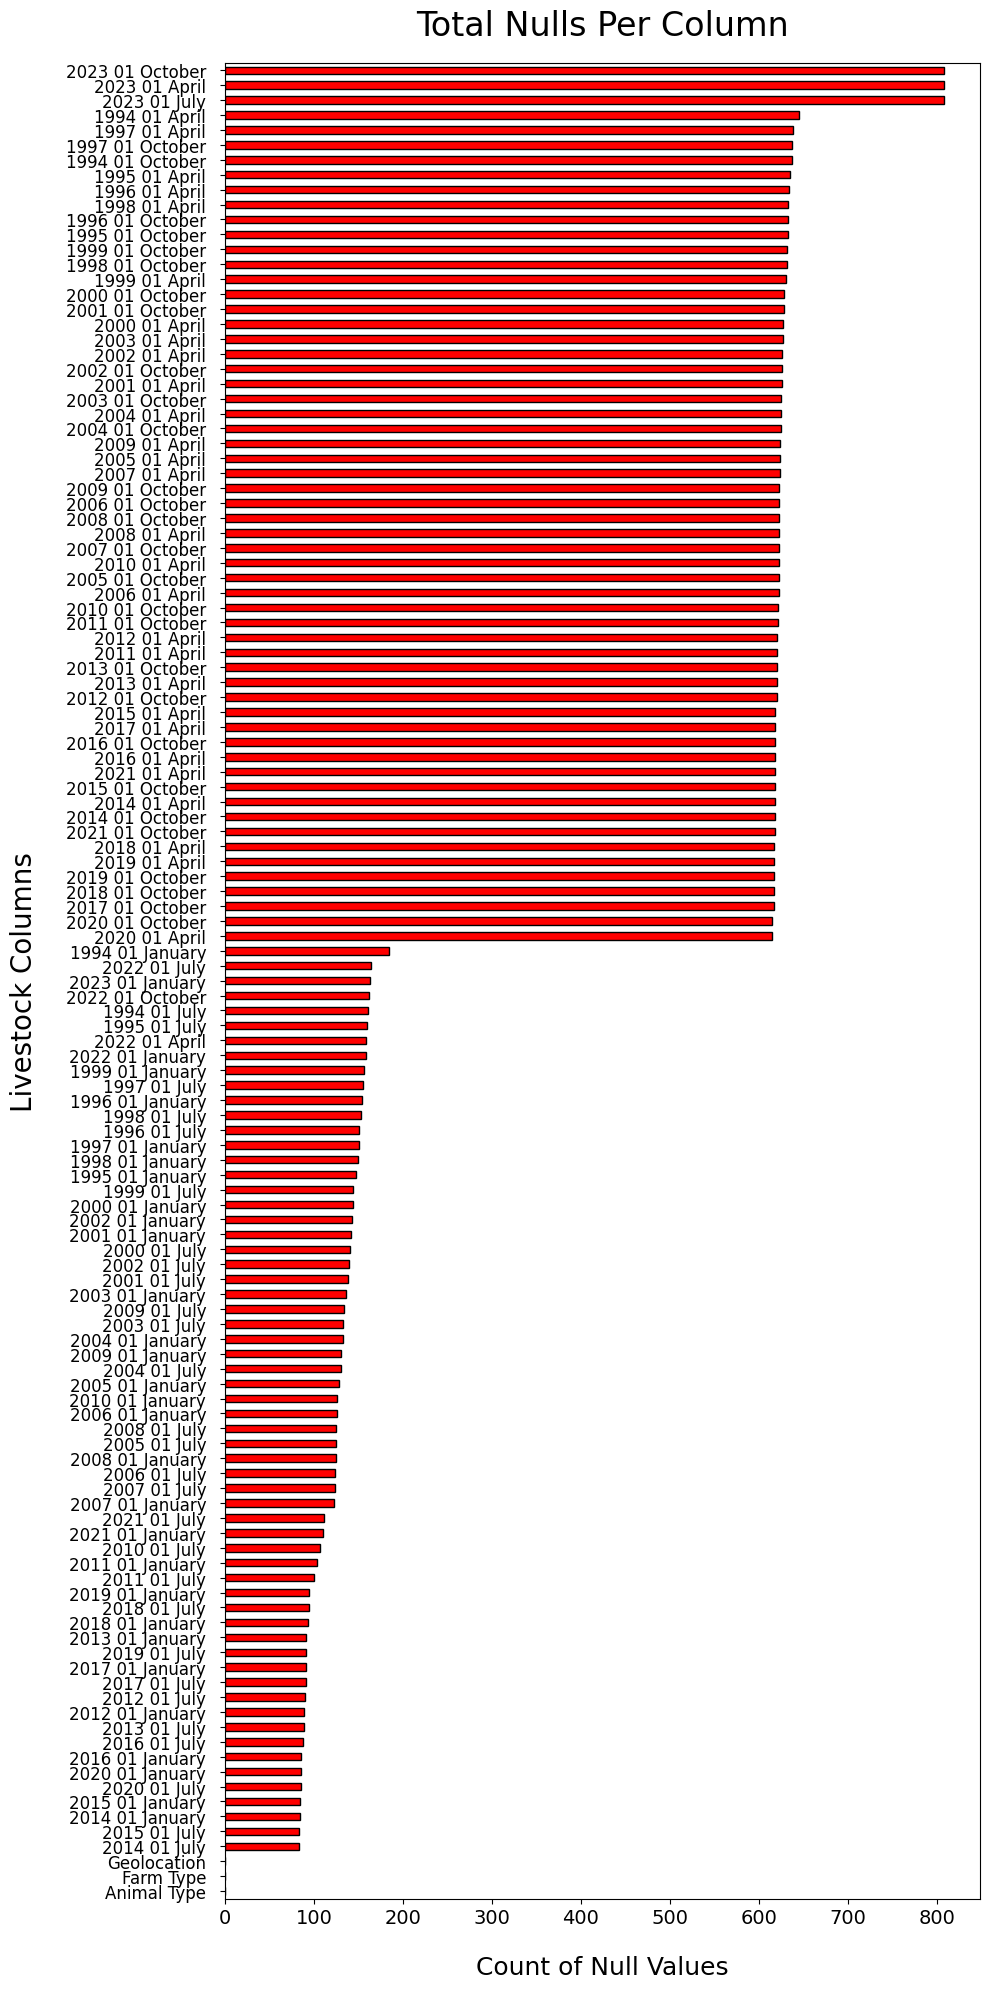

In [12]:
# Count the number of null values in each column
total_null = df_livestock_with_null.isnull().sum()

# Sort values for consistent plotting
sorted_null = total_null.sort_values()

# Plot the horizontal bar chart
plt.figure(figsize=(10, 20))  
ax = sorted_null.plot(kind='barh', color='red', edgecolor='black', linewidth=1)

plt.title('Total Nulls Per Column', fontsize=24, pad=20)  
plt.xlabel('Count of Null Values', fontsize=18, labelpad=20)
plt.ylabel('Livestock Columns', fontsize=20, labelpad=20)
plt.xticks(fontsize=14)  
plt.yticks(fontsize=12)  
plt.tick_params(axis='y', which='major', pad=10)
plt.tight_layout()  # Adjust layout for better label fitting

plt.show()

In [13]:
# Checking Null values in the column "1994 01 April"

df_livestock_copy[df_livestock_copy['1994 01 April'].isna()].head(10)

,Animal Type,Farm Type,Geolocation,1994 01 January,1994 01 April,1994 01 July,1994 01 October,1995 01 January,1995 01 April,1995 01 July,...,2021 01 July,2021 01 October,2022 01 January,2022 01 April,2022 01 July,2022 01 October,2023 01 January,2023 01 April,2023 01 July,2023 01 October
0,Carabao,Backyard,PHILIPPINES,2555492.0,NaN,2664806.0,NaN,2702325.0,NaN,2832240.0,...,2837583.0,NaN,2769604.0,2766991.0,2762309.0,2781425.0,2766009.0,NaN,NaN,NaN
1,Carabao,Backyard,National Capital Region (NCR),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Carabao,Backyard,Cordillera Administrative Region (CAR),89882.0,NaN,97573.0,NaN,99245.0,NaN,115566.0,...,78747.0,NaN,77218.0,77605.0,78637.0,79207.0,78579.0,NaN,NaN,NaN
3,Carabao,Backyard,....Abra,24784.0,NaN,25952.0,NaN,26377.0,NaN,35461.0,...,16408.0,NaN,17475.0,18075.0,17996.0,18591.0,17800.0,NaN,NaN,NaN
4,Carabao,Backyard,....Apayao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17309.0,NaN,17856.0,17240.0,18175.0,18100.0,18045.0,NaN,NaN,NaN
5,Carabao,Backyard,....Benguet,7503.0,NaN,12105.0,NaN,15333.0,NaN,22250.0,...,11606.0,NaN,11427.0,11433.0,11445.0,11713.0,11546.0,NaN,NaN,NaN
6,Carabao,Backyard,....Ifugao,16626.0,NaN,17122.0,NaN,16802.0,NaN,17478.0,...,7649.0,NaN,5470.0,5270.0,5276.0,5280.0,5861.0,NaN,NaN,NaN
7,Carabao,Backyard,....Kalinga,27063.0,NaN,28844.0,NaN,27359.0,NaN,28431.0,...,20518.0,NaN,19585.0,20090.0,20170.0,19883.0,19657.0,NaN,NaN,NaN
8,Carabao,Backyard,....Mountain Province,13906.0,NaN,13550.0,NaN,13374.0,NaN,11946.0,...,5257.0,NaN,5405.0,5497.0,5575.0,5640.0,5670.0,NaN,NaN,NaN
9,Carabao,Backyard,Region I (Ilocos Region),155287.0,NaN,150434.0,NaN,161524.0,NaN,191648.0,...,178890.0,NaN,165745.0,160828.0,156611.0,153234.0,150936.0,NaN,NaN,NaN


In [14]:
# Looking at the Dataset with null values included now.

df_livestock_with_null.head(10)

,Animal Type,Farm Type,Geolocation,1994 01 January,1994 01 April,1994 01 July,1994 01 October,1995 01 January,1995 01 April,1995 01 July,...,2021 01 July,2021 01 October,2022 01 January,2022 01 April,2022 01 July,2022 01 October,2023 01 January,2023 01 April,2023 01 July,2023 01 October
0,Carabao,Backyard,PHILIPPINES,2555492,NaN,2664806,NaN,2702325,NaN,2832240,...,2837583,NaN,2769604,2766991,2762309,2781425,2766009,NaN,NaN,NaN
1,Carabao,Backyard,National Capital Region (NCR),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Carabao,Backyard,Cordillera Administrative Region (CAR),89882,NaN,97573,NaN,99245,NaN,115566,...,78747,NaN,77218,77605,78637,79207,78579,NaN,NaN,NaN
3,Carabao,Backyard,....Abra,24784,NaN,25952,NaN,26377,NaN,35461,...,16408,NaN,17475,18075,17996,18591,17800,NaN,NaN,NaN
4,Carabao,Backyard,....Apayao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17309,NaN,17856,17240,18175,18100,18045,NaN,NaN,NaN
5,Carabao,Backyard,....Benguet,7503,NaN,12105,NaN,15333,NaN,22250,...,11606,NaN,11427,11433,11445,11713,11546,NaN,NaN,NaN
6,Carabao,Backyard,....Ifugao,16626,NaN,17122,NaN,16802,NaN,17478,...,7649,NaN,5470,5270,5276,5280,5861,NaN,NaN,NaN
7,Carabao,Backyard,....Kalinga,27063,NaN,28844,NaN,27359,NaN,28431,...,20518,NaN,19585,20090,20170,19883,19657,NaN,NaN,NaN
8,Carabao,Backyard,....Mountain Province,13906,NaN,13550,NaN,13374,NaN,11946,...,5257,NaN,5405,5497,5575,5640,5670,NaN,NaN,NaN
9,Carabao,Backyard,Region I (Ilocos Region),155287,NaN,150434,NaN,161524,NaN,191648,...,178890,NaN,165745,160828,156611,153234,150936,NaN,NaN,NaN


#### ➡️ Pivoting

In [15]:
df_livestock_copy.replace(['..', '', ' '], 0, inplace=True)
df_livestock_copy.replace({'*': 0, '**': 0}, inplace=True)

In [16]:
df_livestock_copy.fillna(0, inplace=True)

In [17]:
# Melting the Dataset for easier data exploration.

melted_eda = pd.melt(df_livestock_copy, id_vars=['Animal Type', 'Farm Type', 'Geolocation'], 
                           value_vars=quarter_columns, var_name='Quarter', value_name='Livestock_Count')

In [18]:
melted_eda.head(10)

,Animal Type,Farm Type,Geolocation,Quarter,Livestock_Count
0,Carabao,Backyard,PHILIPPINES,1994 01 January,2555492.0
1,Carabao,Backyard,National Capital Region (NCR),1994 01 January,0.0
2,Carabao,Backyard,Cordillera Administrative Region (CAR),1994 01 January,89882.0
3,Carabao,Backyard,....Abra,1994 01 January,24784.0
4,Carabao,Backyard,....Apayao,1994 01 January,0.0
5,Carabao,Backyard,....Benguet,1994 01 January,7503.0
6,Carabao,Backyard,....Ifugao,1994 01 January,16626.0
7,Carabao,Backyard,....Kalinga,1994 01 January,27063.0
8,Carabao,Backyard,....Mountain Province,1994 01 January,13906.0
9,Carabao,Backyard,Region I (Ilocos Region),1994 01 January,155287.0


In [19]:
melted_eda.pivot_table(index='Farm Type', columns='Animal Type', values='Livestock_Count', aggfunc='sum')

Animal Type,Carabao,Cattle,Goat,Swine
Farm Type,,,,
Backyard,549169641.0,424667856.0,648664872.0,2.945400e+09
Commercial,1466358.0,29700705.0,6438756.0,1.178666e+09


In [20]:
melted_eda.pivot_table(index='Animal Type', columns='Geolocation', values='Livestock_Count', aggfunc='sum')

Geolocation,......City of Davao,......City of Zamboanga,....Abra,....Agusan del Norte,....Agusan del Sur,....Aklan,....Albay,....Antique,....Apayao,....Aurora,...,Region IVA (CALABARZON),Region IX (Zamboanga Peninsula),Region V (Bicol Region),Region VI (Western Visayas),Region VII (Central Visayas),Region VIII (Eastern Visayas),Region X (Northern Mindanao),Region XI (Davao Region),Region XII (SOCCSKSARGEN),Region XIII (Caraga)
Animal Type,,,,,,,,,,,,,,,,,,,,,
Carabao,2281336.0,362309.0,1968851.0,1007400.0,2106740.0,1210879.0,3688872.0,2154589.0,630548.0,1233427.0,...,9342534.0,10653152.0,16723964.0,18408122.0,10331658.0,14522257.0,8277224.0,9917298.0,15018957.0,5598547.0
Cattle,1868875.0,732010.0,1173328.0,508809.0,245277.0,1607453.0,679100.0,2757824.0,130684.0,576616.0,...,13905431.0,8139925.0,6123904.0,13108811.0,17393666.0,1534275.0,15923039.0,7628676.0,10917550.0,1012750.0
Goat,2864190.0,739976.0,2056638.0,1460384.0,1734868.0,828412.0,1604003.0,1714009.0,164692.0,735758.0,...,11438039.0,8709645.0,7333185.0,28524811.0,30612938.0,4173687.0,13128387.0,20499001.0,14164792.0,4264055.0
Swine,26404634.0,11403541.0,5512403.0,8820613.0,9778939.0,12977487.0,18389695.0,8440045.0,2262503.0,6942227.0,...,172759855.0,73772604.0,89359371.0,134534307.0,109297289.0,73156185.0,96618251.0,98108415.0,84120363.0,36592278.0


In [21]:
melted_eda.pivot_table(index='Farm Type', columns='Geolocation', values='Livestock_Count', aggfunc='sum')

Geolocation,......City of Davao,......City of Zamboanga,....Abra,....Agusan del Norte,....Agusan del Sur,....Aklan,....Albay,....Antique,....Apayao,....Aurora,...,Region IVA (CALABARZON),Region IX (Zamboanga Peninsula),Region V (Bicol Region),Region VI (Western Visayas),Region VII (Central Visayas),Region VIII (Eastern Visayas),Region X (Northern Mindanao),Region XI (Davao Region),Region XII (SOCCSKSARGEN),Region XIII (Caraga)
Farm Type,,,,,,,,,,,,,,,,,,,,,
Backyard,22455833.0,12800370.0,10606687.0,11416886.0,13560464.0,16140361.0,17739312.0,14724272.0,3184232.0,9432315.0,...,85893335.0,99679612.0,106118694.0,178560476.0,146596895.0,92145529.0,107099149.0,118004976.0,94850969.0,46552210.0
Commercial,10963202.0,437466.0,104533.0,380320.0,305360.0,483870.0,6622358.0,342195.0,4195.0,55713.0,...,121552524.0,1595714.0,13421730.0,16015575.0,21038656.0,1240875.0,26847752.0,18148414.0,29370693.0,915420.0


#### ➡️ Inspect Data Part 2

In [22]:
# Checking the Data Type of each column.

df_livestock.dtypes

Animal Type        object
Farm Type          object
Geolocation        object
1994 01 January    object
1994 01 April      object
                    ...  
2022 01 October    object
2023 01 January    object
2023 01 April      object
2023 01 July       object
2023 01 October    object
Length: 123, dtype: object

In [23]:
# Find the maximum value for each Quarter column

max_values = df_livestock_copy[quarter_columns].max()

with pd.option_context('display.max_rows', None):
    print(max_values)

1994 01 January     6766064.0
1994 01 April       6865041.0
1994 01 July        6927649.0
1994 01 October     7210501.0
1995 01 January     7181340.0
1995 01 April       7132750.0
1995 01 July        7229050.0
1995 01 October     7329650.0
1996 01 January     7238980.0
1996 01 April       7452296.0
1996 01 July        7593530.0
1996 01 October     7810490.0
1997 01 January     7788170.0
1997 01 April       7714560.0
1997 01 July        7828550.0
1997 01 October     8197210.0
1998 01 January     8030580.0
1998 01 April       7968800.0
1998 01 July        7916430.0
1998 01 October     8255290.0
1999 01 January     8179130.0
1999 01 April       8139940.0
1999 01 July        8376910.0
1999 01 October     8552860.0
2000 01 January     8327290.0
2000 01 April       8319120.0
2000 01 July        8510940.0
2000 01 October     8663580.0
2001 01 January     8541800.0
2001 01 April       8756600.0
2001 01 July        8900850.0
2001 01 October     9074210.0
2002 01 January     8935400.0
2002 01 Ap

In [24]:
# Finding the unique values for each categorical column.

unique_animal_types = df_livestock_copy['Animal Type'].unique()
unique_farm_types = df_livestock_copy['Farm Type'].unique()
unique_geolocations = df_livestock_copy['Geolocation'].unique()

print("Unique values in 'Animal Type':")
print(unique_animal_types)

print("\nUnique values in 'Farm Type':")
print(unique_farm_types)

print("\nUnique values in 'Geolocation':")
print(unique_geolocations)

Unique values in 'Animal Type':
['Carabao' 'Cattle' 'Goat' 'Swine']

Unique values in 'Farm Type':
['Backyard' 'Commercial']

Unique values in 'Geolocation':
['PHILIPPINES' 'National Capital Region (NCR)'
 'Cordillera Administrative Region (CAR)' '....Abra' '....Apayao'
 '....Benguet' '....Ifugao' '....Kalinga' '....Mountain Province'
 'Region I (Ilocos Region)' '....Ilocos Norte' '....Ilocos Sur'
 '....La Union' '....Pangasinan' 'Region II (Cagayan Valley)'
 '....Batanes' '....Cagayan' '....Isabela' '....Nueva Vizcaya'
 '....Quirino' 'Region III (Central Luzon)' '....Aurora' '....Bataan'
 '....Bulacan' '....Nueva Ecija' '....Pampanga' '....Tarlac'
 '....Zambales' 'Region IVA (CALABARZON)' '....Batangas' '....Cavite'
 '....Laguna' '....Quezon' '....Rizal' '..MIMAROPA Region'
 '....Marinduque' '....Occidental Mindoro' '....Oriental Mindoro'
 '....Palawan' '....Romblon' 'Region V (Bicol Region)' '....Albay'
 '....Camarines Norte' '....Camarines Sur' '....Catanduanes' '....Masbate'
 '....

#### ➡️ Finding duplicate rows

In [25]:
# Finding the sum of rows that are duplicate.

df_livestock.duplicated().sum()

0

#### ➡️ Standardizing Data Types

Convert the columns `Animal Type`, `Farm Type`, and `Geolocation` to categorical from object data type.

In [26]:
df_livestock['Animal Type'] = df_livestock['Animal Type'].astype('category')
df_livestock['Farm Type'] = df_livestock['Farm Type'].astype('category')
df_livestock['Geolocation'] = df_livestock['Geolocation'].astype('category')

#### ➡️ Create a data dictionary

In [27]:
def create_data_dict(df):
    descriptions = {
        'Animal Type': 'Type of animal present in the farm',
        'Farm Type': 'Type of farm where the animals are (e.g., backyard, commercial)',
        'Geolocation': 'Region and province in the Philippines'
    }
    
    quarter_columns = [col for col in df.columns if col.startswith(('19', '20'))]
    date_descriptions = {col: 'Number of animals present in the farm as of specific reference date' for col in quarter_columns}

    descriptions.update(date_descriptions)
    
    data_dict = pd.DataFrame({
        'Column Name': df.columns,
        'Data Type': df.dtypes,
        'Description': [descriptions.get(col, 'No description available') for col in df.columns]
    })
    
    return data_dict

data_dict_fao = create_data_dict(df_livestock)
print(data_dict_fao.to_markdown(index=False))


| Column Name     | Data Type   | Description                                                         |
|:----------------|:------------|:--------------------------------------------------------------------|
| Animal Type     | category    | Type of animal present in the farm                                  |
| Farm Type       | category    | Type of farm where the animals are (e.g., backyard, commercial)     |
| Geolocation     | category    | Region and province in the Philippines                              |
| 1994 01 January | object      | Number of animals present in the farm as of specific reference date |
| 1994 01 April   | object      | Number of animals present in the farm as of specific reference date |
| 1994 01 July    | object      | Number of animals present in the farm as of specific reference date |
| 1994 01 October | object      | Number of animals present in the farm as of specific reference date |
| 1995 01 January | object      | Number of animals present in t

In [28]:
print("Footnotes of the dataset:")
print("""
    .. Data not applicable
    01 Jan 2023 - Preliminary
    01 Jan 2022 - Revised for Cattle
    01 Apr 2022 - Revised for Carabao
    * - Zamboanga City included in Zamboanga del Sur.
    ** - Davao City included in Davao del Sur.
    Note - Ending Inventory of 2022 are based on the new design of BLPS and new survey frame for CLPS.
    """
     )

Footnotes of the dataset:

    .. Data not applicable
    01 Jan 2023 - Preliminary
    01 Jan 2022 - Revised for Cattle
    01 Apr 2022 - Revised for Carabao
    * - Zamboanga City included in Zamboanga del Sur.
    ** - Davao City included in Davao del Sur.
    Note - Ending Inventory of 2022 are based on the new design of BLPS and new survey frame for CLPS.
    


### 1.2 Data Cleaning

#### ➡️ Handle missing values

In [29]:
# Extended replacement logic - to handle empty strings/whitespace. -k

df_livestock.replace(['..', '', ' '], np.nan, inplace=True)

In [30]:
# Drop Columns that are purely null.

df_livestock.dropna(axis=1, how='all', inplace=True)

#### ➡️ Handle invalid data

In [31]:
# ** refers to Davao City included in Davao del Sur.
# * refers to Zamboanga City included in Davao del Sur.

df_livestock.replace({'*': np.nan, '**': np.nan}, inplace=True)

#### ➡️ Convert Data Types

In [32]:
# Convert the Quarter based columns to numeric data type.

# Re-defining Quarter Columns again for later use.
quarter_columns = df_livestock.columns[3:]
df_livestock[quarter_columns] = df_livestock[quarter_columns].apply(pd.to_numeric, errors='coerce')

df_livestock.dtypes

Animal Type        category
Farm Type          category
Geolocation        category
1994 01 January     float64
1994 01 April       float64
                     ...   
2022 01 January     float64
2022 01 April       float64
2022 01 July        float64
2022 01 October     float64
2023 01 January     float64
Length: 120, dtype: object

#### ➡️ Standardizing Column Names

In [33]:
# Replace spaces in Column names to "_"

df_livestock.columns = df_livestock.columns.str.upper().str.replace(' ', '_')

In [34]:
# Standardized Column Names

df_livestock.head(0) 

,ANIMAL_TYPE,FARM_TYPE,GEOLOCATION,1994_01_JANUARY,1994_01_APRIL,1994_01_JULY,1994_01_OCTOBER,1995_01_JANUARY,1995_01_APRIL,1995_01_JULY,...,2020_01_OCTOBER,2021_01_JANUARY,2021_01_APRIL,2021_01_JULY,2021_01_OCTOBER,2022_01_JANUARY,2022_01_APRIL,2022_01_JULY,2022_01_OCTOBER,2023_01_JANUARY


#### Handling Date Columns 

**Logic:**
1. For each column in df_livestock.columns, check if it starts with '19' or '20'. If it does, add it to the quarter_columns list.
2. For all columns in the quarter_columns list, attempt to convert the values in these columns to a numeric (int/float) data type. If there are non-numeric or missing values, replace with NaN.

In [35]:
# Quarter columns redefined since the column names were standerdized.

quarter_columns = [col for col in df_livestock.columns if col.startswith(('19', '20'))]
df_livestock[quarter_columns] = df_livestock[quarter_columns].apply(pd.to_numeric, errors='coerce')

### 1.3 Feature Engineering

#### ➡️ Merge City Data into Province Data

In [36]:
def merge_city_to_province(df, province_name, city_name):
    if province_name in df['GEOLOCATION'].values and city_name in df['GEOLOCATION'].values:
        row_city = df[df['GEOLOCATION'] == city_name]
        df.loc[df['GEOLOCATION'] == province_name, df.columns[3:]] += row_city.iloc[0, 3:]
        df = df[df['GEOLOCATION'] != city_name]
    return df

#### ➡️ Merge City of Zamboanga with Zamboanga del Sur, and City of Davao with Davao del Sur

In [37]:
# Merged from the start to keep up with the current changes.

df_livestock = merge_city_to_province(df_livestock, '....Zamboanga del Sur', '......City of Zamboanga')
df_livestock = merge_city_to_province(df_livestock, '....Davao del Sur', '......City of Davao')

#### ➡️ Split GEOLOCATION into REGION and PROVINCE

In [38]:
df_livestock['REGION'] = df_livestock['GEOLOCATION'].where(~df_livestock['GEOLOCATION'].str.startswith('....')).ffill()
df_livestock['PROVINCE'] = df_livestock['GEOLOCATION'].where(df_livestock['GEOLOCATION'].str.startswith('....'))
df_livestock['PROVINCE'] = df_livestock['PROVINCE'].str.replace('....', '', regex=False)
df_livestock['REGION'] = df_livestock['REGION'].str.replace('..', '', regex=False)
df_livestock.drop(columns=['GEOLOCATION'], inplace=True)

In [39]:
# REGION and PROVINCE columns created

df_livestock.head(10) 

,ANIMAL_TYPE,FARM_TYPE,1994_01_JANUARY,1994_01_APRIL,1994_01_JULY,1994_01_OCTOBER,1995_01_JANUARY,1995_01_APRIL,1995_01_JULY,1995_01_OCTOBER,...,2021_01_APRIL,2021_01_JULY,2021_01_OCTOBER,2022_01_JANUARY,2022_01_APRIL,2022_01_JULY,2022_01_OCTOBER,2023_01_JANUARY,REGION,PROVINCE
0,Carabao,Backyard,2555492.0,NaN,2664806.0,NaN,2702325.0,NaN,2832240.0,NaN,...,NaN,2837583.0,NaN,2769604.0,2766991.0,2762309.0,2781425.0,2766009.0,PHILIPPINES,NaN
1,Carabao,Backyard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,National Capital Region (NCR),NaN
2,Carabao,Backyard,89882.0,NaN,97573.0,NaN,99245.0,NaN,115566.0,NaN,...,NaN,78747.0,NaN,77218.0,77605.0,78637.0,79207.0,78579.0,Cordillera Administrative Region (CAR),NaN
3,Carabao,Backyard,24784.0,NaN,25952.0,NaN,26377.0,NaN,35461.0,NaN,...,NaN,16408.0,NaN,17475.0,18075.0,17996.0,18591.0,17800.0,Cordillera Administrative Region (CAR),Abra
4,Carabao,Backyard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,17309.0,NaN,17856.0,17240.0,18175.0,18100.0,18045.0,Cordillera Administrative Region (CAR),Apayao
5,Carabao,Backyard,7503.0,NaN,12105.0,NaN,15333.0,NaN,22250.0,NaN,...,NaN,11606.0,NaN,11427.0,11433.0,11445.0,11713.0,11546.0,Cordillera Administrative Region (CAR),Benguet
6,Carabao,Backyard,16626.0,NaN,17122.0,NaN,16802.0,NaN,17478.0,NaN,...,NaN,7649.0,NaN,5470.0,5270.0,5276.0,5280.0,5861.0,Cordillera Administrative Region (CAR),Ifugao
7,Carabao,Backyard,27063.0,NaN,28844.0,NaN,27359.0,NaN,28431.0,NaN,...,NaN,20518.0,NaN,19585.0,20090.0,20170.0,19883.0,19657.0,Cordillera Administrative Region (CAR),Kalinga
8,Carabao,Backyard,13906.0,NaN,13550.0,NaN,13374.0,NaN,11946.0,NaN,...,NaN,5257.0,NaN,5405.0,5497.0,5575.0,5640.0,5670.0,Cordillera Administrative Region (CAR),Mountain Province
9,Carabao,Backyard,155287.0,NaN,150434.0,NaN,161524.0,NaN,191648.0,NaN,...,NaN,178890.0,NaN,165745.0,160828.0,156611.0,153234.0,150936.0,Region I (Ilocos Region),NaN


#### ➡️ Fixing Data Names

In [40]:
df_livestock['REGION'].unique() # Initial REGION names.

array(['PHILIPPINES', 'National Capital Region (NCR)',
       'Cordillera Administrative Region (CAR)',
       'Region I (Ilocos Region)', 'Region II (Cagayan Valley)',
       'Region III (Central Luzon)', 'Region IVA (CALABARZON)',
       'MIMAROPA Region', 'Region V (Bicol Region)',
       'Region VI (Western Visayas)', 'Region VII (Central Visayas)',
       'Region VIII (Eastern Visayas)', 'Region IX (Zamboanga Peninsula)',
       'Region X (Northern Mindanao)', 'Region XI (Davao Region)',
       'Region XII (SOCCSKSARGEN)', 'Region XIII (Caraga)',
       'Bangsamoro Autonomous Region in Muslim Mindanao (BARMM)'],
      dtype=object)

In [41]:
df_livestock['PROVINCE'].unique() # Initial PROVINCE names

array([nan, 'Abra', 'Apayao', 'Benguet', 'Ifugao', 'Kalinga',
       'Mountain Province', 'Ilocos Norte', 'Ilocos Sur', 'La Union',
       'Pangasinan', 'Batanes', 'Cagayan', 'Isabela', 'Nueva Vizcaya',
       'Quirino', 'Aurora', 'Bataan', 'Bulacan', 'Nueva Ecija',
       'Pampanga', 'Tarlac', 'Zambales', 'Batangas', 'Cavite', 'Laguna',
       'Quezon', 'Rizal', 'Marinduque', 'Occidental Mindoro',
       'Oriental Mindoro', 'Palawan', 'Romblon', 'Albay',
       'Camarines Norte', 'Camarines Sur', 'Catanduanes', 'Masbate',
       'Sorsogon', 'Aklan', 'Antique', 'Capiz', 'Guimaras', 'Iloilo',
       'Negros Occidental', 'Bohol', 'Cebu', 'Negros Oriental',
       'Siquijor', 'Biliran', 'Eastern Samar', 'Leyte', 'Northern Samar',
       'Samar', 'Southern Leyte', 'Zamboanga del Norte',
       'Zamboanga del Sur', 'Zamboanga Sibugay', 'Bukidnon', 'Camiguin',
       'Lanao del Norte', 'Misamis Occidental', 'Misamis Oriental',
       'Davao de Oro (Compostela Valley)', 'Davao del Norte',
   

In [42]:
# Standardizing the Region names.

region_names = {
    'PHILIPPINES': 'Regions_Total',
    'National Capital Region (NCR)': 'NCR',
    'Cordillera Administrative Region (CAR)': 'CAR',
    'Region I (Ilocos Region)': 'REGION_I',
    'Region II (Cagayan Valley)': 'REGION_II',
    'Region III (Central Luzon)': 'REGION_III',
    'Region IVA (CALABARZON)': 'REGION_IV',
    'MIMAROPA Region': 'MIMAROPA',
    'Region V (Bicol Region)': 'REGION_V',
    'Region VI (Western Visayas)': 'REGION_VI',
    'Region VII (Central Visayas)': 'REGION_VII',
    'Region VIII (Eastern Visayas)': 'REGION_VIII',
    'Region IX (Zamboanga Peninsula)': 'REGION_IX',
    'Region X (Northern Mindanao)': 'REGION_X',
    'Region XI (Davao Region)': 'REGION_XI',
    'Region XII (SOCCSKSARGEN)': 'REGION_XII',
    'Region XIII (Caraga)': 'REGION_XIII',
    'Bangsamoro Autonomous Region in Muslim Mindanao (BARMM)': 'BARMM'
}

In [43]:
df_livestock['REGION'] = df_livestock['REGION'].replace(region_names)

In [44]:
# Fills Null values or missing values with 'N/A'
# This is assuming the associated Region does not have a province or is just a summation of all provinces under it.

df_livestock['PROVINCE'] = df_livestock['PROVINCE'].fillna('N/A')

In [45]:
# Checking the results.

df_livestock.head(10)

,ANIMAL_TYPE,FARM_TYPE,1994_01_JANUARY,1994_01_APRIL,1994_01_JULY,1994_01_OCTOBER,1995_01_JANUARY,1995_01_APRIL,1995_01_JULY,1995_01_OCTOBER,...,2021_01_APRIL,2021_01_JULY,2021_01_OCTOBER,2022_01_JANUARY,2022_01_APRIL,2022_01_JULY,2022_01_OCTOBER,2023_01_JANUARY,REGION,PROVINCE
0,Carabao,Backyard,2555492.0,NaN,2664806.0,NaN,2702325.0,NaN,2832240.0,NaN,...,NaN,2837583.0,NaN,2769604.0,2766991.0,2762309.0,2781425.0,2766009.0,Regions_Total,N/A
1,Carabao,Backyard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NCR,N/A
2,Carabao,Backyard,89882.0,NaN,97573.0,NaN,99245.0,NaN,115566.0,NaN,...,NaN,78747.0,NaN,77218.0,77605.0,78637.0,79207.0,78579.0,CAR,N/A
3,Carabao,Backyard,24784.0,NaN,25952.0,NaN,26377.0,NaN,35461.0,NaN,...,NaN,16408.0,NaN,17475.0,18075.0,17996.0,18591.0,17800.0,CAR,Abra
4,Carabao,Backyard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,17309.0,NaN,17856.0,17240.0,18175.0,18100.0,18045.0,CAR,Apayao
5,Carabao,Backyard,7503.0,NaN,12105.0,NaN,15333.0,NaN,22250.0,NaN,...,NaN,11606.0,NaN,11427.0,11433.0,11445.0,11713.0,11546.0,CAR,Benguet
6,Carabao,Backyard,16626.0,NaN,17122.0,NaN,16802.0,NaN,17478.0,NaN,...,NaN,7649.0,NaN,5470.0,5270.0,5276.0,5280.0,5861.0,CAR,Ifugao
7,Carabao,Backyard,27063.0,NaN,28844.0,NaN,27359.0,NaN,28431.0,NaN,...,NaN,20518.0,NaN,19585.0,20090.0,20170.0,19883.0,19657.0,CAR,Kalinga
8,Carabao,Backyard,13906.0,NaN,13550.0,NaN,13374.0,NaN,11946.0,NaN,...,NaN,5257.0,NaN,5405.0,5497.0,5575.0,5640.0,5670.0,CAR,Mountain Province
9,Carabao,Backyard,155287.0,NaN,150434.0,NaN,161524.0,NaN,191648.0,NaN,...,NaN,178890.0,NaN,165745.0,160828.0,156611.0,153234.0,150936.0,REGION_I,N/A


In [46]:
df_livestock.tail(10)

,ANIMAL_TYPE,FARM_TYPE,1994_01_JANUARY,1994_01_APRIL,1994_01_JULY,1994_01_OCTOBER,1995_01_JANUARY,1995_01_APRIL,1995_01_JULY,1995_01_OCTOBER,...,2021_01_APRIL,2021_01_JULY,2021_01_OCTOBER,2022_01_JANUARY,2022_01_APRIL,2022_01_JULY,2022_01_OCTOBER,2023_01_JANUARY,REGION,PROVINCE
798,Swine,Commercial,NaN,NaN,NaN,210.0,230.0,230.0,490.0,250.0,...,6014.0,5670.0,5159.0,5051.0,3890.0,2591.0,884.0,464.0,REGION_XIII,Agusan del Sur
799,Swine,Commercial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,32.0,27.0,14.0,79.0,176.0,117.0,112.0,49.0,REGION_XIII,Dinagat Islands
800,Swine,Commercial,192.0,225.0,159.0,160.0,150.0,150.0,160.0,180.0,...,590.0,436.0,519.0,7.0,17.0,NaN,NaN,NaN,REGION_XIII,Surigao del Norte
801,Swine,Commercial,NaN,NaN,NaN,NaN,30.0,30.0,20.0,40.0,...,3001.0,3122.0,3322.0,3741.0,52.0,18.0,14.0,11.0,REGION_XIII,Surigao del Sur
802,Swine,Commercial,125.0,125.0,275.0,180.0,210.0,120.0,120.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BARMM,N/A
803,Swine,Commercial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BARMM,Basilan
804,Swine,Commercial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BARMM,Lanao del Sur
805,Swine,Commercial,NaN,NaN,35.0,40.0,40.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BARMM,Maguindanao
806,Swine,Commercial,125.0,125.0,240.0,140.0,120.0,120.0,120.0,120.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BARMM,Sulu
807,Swine,Commercial,NaN,NaN,NaN,NaN,50.0,NaN,NaN,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BARMM,Tawi-tawi


In [47]:
df_livestock['REGION'].unique() # Checking the uniquely renamed values under 'REGION'.

array(['Regions_Total', 'NCR', 'CAR', 'REGION_I', 'REGION_II',
       'REGION_III', 'REGION_IV', 'MIMAROPA', 'REGION_V', 'REGION_VI',
       'REGION_VII', 'REGION_VIII', 'REGION_IX', 'REGION_X', 'REGION_XI',
       'REGION_XII', 'REGION_XIII', 'BARMM'], dtype=object)

In [48]:
df_livestock['PROVINCE'].unique() # The null value at the start is now 'N/A'

array(['N/A', 'Abra', 'Apayao', 'Benguet', 'Ifugao', 'Kalinga',
       'Mountain Province', 'Ilocos Norte', 'Ilocos Sur', 'La Union',
       'Pangasinan', 'Batanes', 'Cagayan', 'Isabela', 'Nueva Vizcaya',
       'Quirino', 'Aurora', 'Bataan', 'Bulacan', 'Nueva Ecija',
       'Pampanga', 'Tarlac', 'Zambales', 'Batangas', 'Cavite', 'Laguna',
       'Quezon', 'Rizal', 'Marinduque', 'Occidental Mindoro',
       'Oriental Mindoro', 'Palawan', 'Romblon', 'Albay',
       'Camarines Norte', 'Camarines Sur', 'Catanduanes', 'Masbate',
       'Sorsogon', 'Aklan', 'Antique', 'Capiz', 'Guimaras', 'Iloilo',
       'Negros Occidental', 'Bohol', 'Cebu', 'Negros Oriental',
       'Siquijor', 'Biliran', 'Eastern Samar', 'Leyte', 'Northern Samar',
       'Samar', 'Southern Leyte', 'Zamboanga del Norte',
       'Zamboanga del Sur', 'Zamboanga Sibugay', 'Bukidnon', 'Camiguin',
       'Lanao del Norte', 'Misamis Occidental', 'Misamis Oriental',
       'Davao de Oro (Compostela Valley)', 'Davao del Norte',
 

#### ➡️ Drop 'Regions_Total' Column in REGION

Including `Regions_Total` would distort the comparisons — since it's not a specific region but rather an aggregate (sum).
> `Regions_Total` was created in region_names dictionary

In [49]:
df_livestock = df_livestock[(df_livestock['REGION'] != 'Regions_Total')]

In [50]:
# Keeps rows where REGION has 'NCR', and then if its not NCR, it checks if 'PROVINCE' is not 'N/A' and keeps it if true.
# Region that is not NCR and has 'N/A' would mean it is the sum livestock of a specific animal on that region.

df_livestock = df_livestock[(df_livestock['REGION'] == 'NCR') | (df_livestock['PROVINCE'] != 'N/A')]

In [51]:
# Checking dataframe again.

df_livestock.head(10)

,ANIMAL_TYPE,FARM_TYPE,1994_01_JANUARY,1994_01_APRIL,1994_01_JULY,1994_01_OCTOBER,1995_01_JANUARY,1995_01_APRIL,1995_01_JULY,1995_01_OCTOBER,...,2021_01_APRIL,2021_01_JULY,2021_01_OCTOBER,2022_01_JANUARY,2022_01_APRIL,2022_01_JULY,2022_01_OCTOBER,2023_01_JANUARY,REGION,PROVINCE
1,Carabao,Backyard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NCR,N/A
3,Carabao,Backyard,24784.0,NaN,25952.0,NaN,26377.0,NaN,35461.0,NaN,...,NaN,16408.0,NaN,17475.0,18075.0,17996.0,18591.0,17800.0,CAR,Abra
4,Carabao,Backyard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,17309.0,NaN,17856.0,17240.0,18175.0,18100.0,18045.0,CAR,Apayao
5,Carabao,Backyard,7503.0,NaN,12105.0,NaN,15333.0,NaN,22250.0,NaN,...,NaN,11606.0,NaN,11427.0,11433.0,11445.0,11713.0,11546.0,CAR,Benguet
6,Carabao,Backyard,16626.0,NaN,17122.0,NaN,16802.0,NaN,17478.0,NaN,...,NaN,7649.0,NaN,5470.0,5270.0,5276.0,5280.0,5861.0,CAR,Ifugao
7,Carabao,Backyard,27063.0,NaN,28844.0,NaN,27359.0,NaN,28431.0,NaN,...,NaN,20518.0,NaN,19585.0,20090.0,20170.0,19883.0,19657.0,CAR,Kalinga
8,Carabao,Backyard,13906.0,NaN,13550.0,NaN,13374.0,NaN,11946.0,NaN,...,NaN,5257.0,NaN,5405.0,5497.0,5575.0,5640.0,5670.0,CAR,Mountain Province
10,Carabao,Backyard,26633.0,NaN,24630.0,NaN,24420.0,NaN,29294.0,NaN,...,NaN,37160.0,NaN,35862.0,35465.0,35095.0,35150.0,34520.0,REGION_I,Ilocos Norte
11,Carabao,Backyard,19360.0,NaN,26344.0,NaN,29157.0,NaN,34760.0,NaN,...,NaN,24200.0,NaN,24162.0,23685.0,23254.0,23266.0,23634.0,REGION_I,Ilocos Sur
12,Carabao,Backyard,26214.0,NaN,27750.0,NaN,31437.0,NaN,33200.0,NaN,...,NaN,49622.0,NaN,50403.0,49687.0,49301.0,48502.0,47407.0,REGION_I,La Union


#### ➡️ Filling Up Missing Values

Rows where PROVINCE is 'N/A' generally correspond to regions like NCR, which don’t have provinces under them. Forward-filling such rows would carry values from unrelated provinces, leading to incorrect data for regions like NCR.

In [52]:
# 1. Forward Fill for all date columns
df_livestock[quarter_columns] = df_livestock[quarter_columns].ffill(axis=1)

Using forward-fill and leaving the remaining NaN values as is is reasonable.
> **Forward-fill** manages continuous periods where livestock counts are consistent.\
> **NaN Value** indicates livestock data that might not have existed, which can be useful for analysis or visualization. For example, use NaN to visually indicate missing data differently from valid zero counts.

In [53]:
# Checking the Forward Filled Dataset.

df_livestock.head(5)

,ANIMAL_TYPE,FARM_TYPE,1994_01_JANUARY,1994_01_APRIL,1994_01_JULY,1994_01_OCTOBER,1995_01_JANUARY,1995_01_APRIL,1995_01_JULY,1995_01_OCTOBER,...,2021_01_APRIL,2021_01_JULY,2021_01_OCTOBER,2022_01_JANUARY,2022_01_APRIL,2022_01_JULY,2022_01_OCTOBER,2023_01_JANUARY,REGION,PROVINCE
1,Carabao,Backyard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NCR,N/A
3,Carabao,Backyard,24784.0,24784.0,25952.0,25952.0,26377.0,26377.0,35461.0,35461.0,...,15701.0,16408.0,16408.0,17475.0,18075.0,17996.0,18591.0,17800.0,CAR,Abra
4,Carabao,Backyard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18290.0,17309.0,17309.0,17856.0,17240.0,18175.0,18100.0,18045.0,CAR,Apayao
5,Carabao,Backyard,7503.0,7503.0,12105.0,12105.0,15333.0,15333.0,22250.0,22250.0,...,11433.0,11606.0,11606.0,11427.0,11433.0,11445.0,11713.0,11546.0,CAR,Benguet
6,Carabao,Backyard,16626.0,16626.0,17122.0,17122.0,16802.0,16802.0,17478.0,17478.0,...,7725.0,7649.0,7649.0,5470.0,5270.0,5276.0,5280.0,5861.0,CAR,Ifugao


In [54]:
# Check each column for '0' values

for column in df_livestock.columns:
    has_zero = (df_livestock[column] == 0).any()
    print(f"Column '{column}' has zero values: {has_zero}")

Column 'ANIMAL_TYPE' has zero values: False
Column 'FARM_TYPE' has zero values: False
Column '1994_01_JANUARY' has zero values: False
Column '1994_01_APRIL' has zero values: False
Column '1994_01_JULY' has zero values: False
Column '1994_01_OCTOBER' has zero values: False
Column '1995_01_JANUARY' has zero values: False
Column '1995_01_APRIL' has zero values: False
Column '1995_01_JULY' has zero values: False
Column '1995_01_OCTOBER' has zero values: False
Column '1996_01_JANUARY' has zero values: False
Column '1996_01_APRIL' has zero values: False
Column '1996_01_JULY' has zero values: False
Column '1996_01_OCTOBER' has zero values: False
Column '1997_01_JANUARY' has zero values: False
Column '1997_01_APRIL' has zero values: False
Column '1997_01_JULY' has zero values: False
Column '1997_01_OCTOBER' has zero values: False
Column '1998_01_JANUARY' has zero values: False
Column '1998_01_APRIL' has zero values: False
Column '1998_01_JULY' has zero values: False
Column '1998_01_OCTOBER' ha

Ideally, the -1 values should only appear before the first valid livestock count in each series of data, not between two valid values.

In [55]:
negative_inbet = df_livestock[
    (df_livestock['1994_01_JANUARY'] > 0) & 
    (df_livestock[quarter_columns[1:]].isin([-1]).any(axis=1))
]

negative_inbet.head(3) # 94 total|

,ANIMAL_TYPE,FARM_TYPE,1994_01_JANUARY,1994_01_APRIL,1994_01_JULY,1994_01_OCTOBER,1995_01_JANUARY,1995_01_APRIL,1995_01_JULY,1995_01_OCTOBER,...,2021_01_APRIL,2021_01_JULY,2021_01_OCTOBER,2022_01_JANUARY,2022_01_APRIL,2022_01_JULY,2022_01_OCTOBER,2023_01_JANUARY,REGION,PROVINCE


However, this is not the case, given the row shown above. There are instances where in there's **-1** between two valid values.
> This _could_ be a problem, since having **-1** values after the first valid livestock could affect trend analysis — can skew results.

Some possible solutions:
> Leave -1 Values if the group will like to preserve this absence of data in between periods.\
> Forward-fill again for these specific rows to fill in the gaps after the valid first value.

If the group decides to forward-fill again, use the following code snippet. Otherwise, please discard.

In [56]:
#df_livestock[quarter_columns] = negative_inbetween[quarter_columns].ffill(axis=1)

#### ➡️ Region with N/A as Province

NCR is the only region without a province, therefore we can leave province for NCR as N/A.
> It is also an option to replace N/A with NCR for clarity — the which the cell below does.

In [57]:
# Replaces Provinces with 'N/A' where its Region is 'NCR' with 'NCR' itself.

df_livestock.loc[(df_livestock['REGION'] == 'NCR') & (df_livestock['PROVINCE'] == 'N/A'), 'PROVINCE'] = 'NCR'

#### ➡️ Melt Date Columns into One Single Column With Their Corresponding Values

In [58]:
# Reshape data (melt) to long format with QUARTER and LIVESTOCK_COUNT
melted_livestock = pd.melt(df_livestock, id_vars=['ANIMAL_TYPE', 'FARM_TYPE', 'PROVINCE', 'REGION'], 
                           value_vars=quarter_columns, var_name='QUARTER', value_name='LIVESTOCK_COUNT')

In [59]:
melted_livestock.head()

,ANIMAL_TYPE,FARM_TYPE,PROVINCE,REGION,QUARTER,LIVESTOCK_COUNT
0,Carabao,Backyard,NCR,NCR,1994_01_JANUARY,NaN
1,Carabao,Backyard,Abra,CAR,1994_01_JANUARY,24784.0
2,Carabao,Backyard,Apayao,CAR,1994_01_JANUARY,NaN
3,Carabao,Backyard,Benguet,CAR,1994_01_JANUARY,7503.0
4,Carabao,Backyard,Ifugao,CAR,1994_01_JANUARY,16626.0


In [60]:
# Checking the datatypes of the new Melted Dataset.

melted_livestock.dtypes

ANIMAL_TYPE        category
FARM_TYPE          category
PROVINCE             object
REGION               object
QUARTER              object
LIVESTOCK_COUNT     float64
dtype: object

In [61]:
# Turning these columns into 'category' datatype

melted_livestock['PROVINCE'] = melted_livestock['PROVINCE'].astype('category')
melted_livestock['REGION'] = melted_livestock['REGION'].astype('category')

In [62]:
# Turning QUARTER to string type

melted_livestock['QUARTER'] = melted_livestock['QUARTER'].astype(str)

# Convert QUARTER to datetime format directly on the column
melted_livestock['QUARTER'] = pd.to_datetime(
    melted_livestock['QUARTER'].str.replace('_', ' ', regex=False), 
    format='%Y %d %B',
    errors='coerce'
)

In [63]:
# Checking the new Dataset Data-Types again.

melted_livestock.dtypes

ANIMAL_TYPE              category
FARM_TYPE                category
PROVINCE                 category
REGION                   category
QUARTER            datetime64[ns]
LIVESTOCK_COUNT           float64
dtype: object

#### ➡️ New Data Dictionary for melted_livestock Dataframe

In [64]:
def new_dd(df):
    descriptions = {
        'ANIMAL_TYPE': 'Type of animal present in the farm.',
        'FARM_TYPE': 'Type of farm where the animals are.',
        'PROVINCE': 'Specific province in the Philippines',
        'REGION': 'Region in the Philippines',
        'QUARTER': 'Quarter of the year when the data was recorded.',
        'LIVESTOCK_COUNT': 'Number of animals present in the farm as of the specific quarter'
    }
    
    # Create the data dictionary DataFrame
    data_dict = pd.DataFrame({
        'Column Name': df.columns,
        'Data Type': df.dtypes,
        'Description': [descriptions.get(col, 'No description available') for col in df.columns]
    })
    
    return data_dict

In [65]:
new_dd = new_dd(melted_livestock)

In [66]:
print(new_dd.to_markdown(index=False))

| Column Name     | Data Type      | Description                                                      |
|:----------------|:---------------|:-----------------------------------------------------------------|
| ANIMAL_TYPE     | category       | Type of animal present in the farm.                              |
| FARM_TYPE       | category       | Type of farm where the animals are.                              |
| PROVINCE        | category       | Specific province in the Philippines                             |
| REGION          | category       | Region in the Philippines                                        |
| QUARTER         | datetime64[ns] | Quarter of the year when the data was recorded.                  |
| LIVESTOCK_COUNT | float64        | Number of animals present in the farm as of the specific quarter |


In [67]:
melted_livestock['REGION'].unique()

['NCR', 'CAR', 'REGION_I', 'REGION_II', 'REGION_III', ..., 'REGION_X', 'REGION_XI', 'REGION_XII', 'REGION_XIII', 'BARMM']
Length: 17
Categories (17, object): ['BARMM', 'CAR', 'MIMAROPA', 'NCR', ..., 'REGION_X', 'REGION_XI', 'REGION_XII', 'REGION_XIII']

#### ➡️ Save Cleaned Data

Create a new CSV file with the melted and cleaned `2E4FINL0` data.

In [68]:
melted_livestock.to_csv('2E4FINL0_cleaned.csv', index=False)

### 1.4 Visualization

#### ➡️ Visualizing through Bar Graph

In [69]:
# Make a copy of the melted DataFrame
melted_livestock_copy = melted_livestock.copy()

# Filter for specific Animal Type
carabao_filtered = melted_livestock_copy[
    (melted_livestock_copy['ANIMAL_TYPE'] == 'Carabao') &
    (melted_livestock_copy['FARM_TYPE'].isin(['Backyard', 'Commercial']))
]

swine_filtered = melted_livestock_copy[
    (melted_livestock_copy['ANIMAL_TYPE'] == 'Swine') &
    (melted_livestock_copy['FARM_TYPE'].isin(['Backyard', 'Commercial']))
]

goat_filtered = melted_livestock_copy[
    (melted_livestock_copy['ANIMAL_TYPE'] == 'Goat') &
    (melted_livestock_copy['FARM_TYPE'].isin(['Backyard', 'Commercial']))
]

cattle_filtered = melted_livestock_copy[
    (melted_livestock_copy['ANIMAL_TYPE'] == 'Goat') &
    (melted_livestock_copy['FARM_TYPE'].isin(['Backyard', 'Commercial']))
]

# Group by REGION and FARM_TYPE and sum the LIVESTOCK_COUNT
grouped_livestock = carabao_filtered.groupby(['REGION', 'FARM_TYPE'], as_index=False).agg(
    LIVESTOCK_COUNT=('LIVESTOCK_COUNT', 'sum')
)

# Pivot the data to make it easier to plot side-by-side bars
pivoted_livestock = grouped_livestock.pivot(
    index='REGION', 
    columns='FARM_TYPE', 
    values='LIVESTOCK_COUNT'
).reset_index()

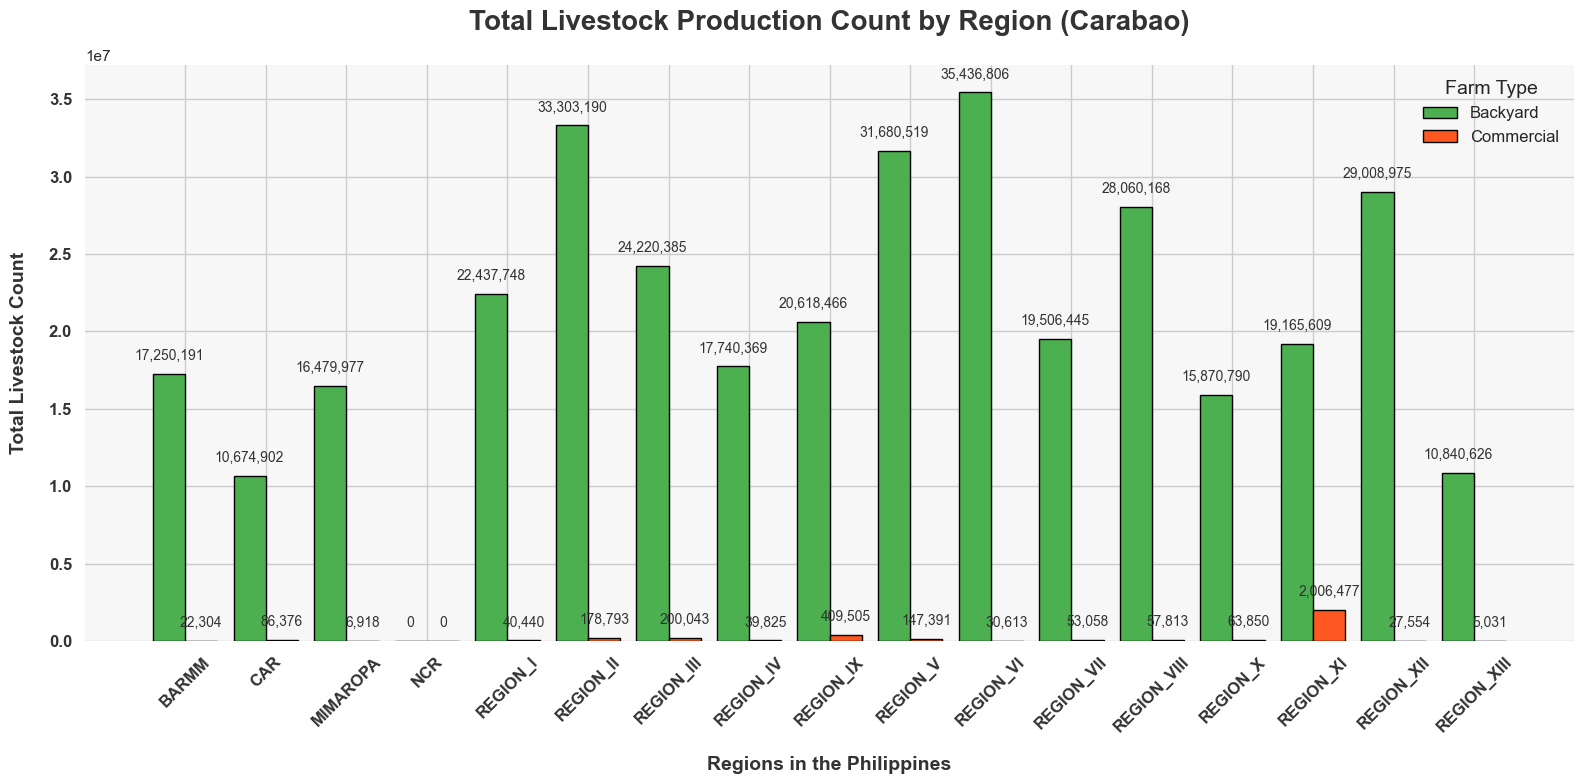

In [70]:
# Set a modern style
sns.set_theme(style="whitegrid")

# Define a custom color palette
backyard_color = "#4CAF50"  # Soft green for Backyard
commercial_color = "#FF5722"  # Warm orange for Commercial
background_color = "#f7f7f7"  # Light gray for the background

# Create the figure
plt.figure(figsize=(16, 8))
plt.gca().set_facecolor(background_color)  # Set the background color

width = 0.4  # Width of each bar

# Define the positions for Backyard and Commercial bars
x = range(len(pivoted_livestock['REGION']))
plt.bar(
    [pos - width / 2 for pos in x], 
    pivoted_livestock['Backyard'], 
    width=width, 
    label='Backyard', 
    color=backyard_color,
    edgecolor='black'
)
plt.bar(
    [pos + width / 2 for pos in x], 
    pivoted_livestock['Commercial'], 
    width=width, 
    label='Commercial', 
    color=commercial_color,
    edgecolor='black'
)

# Add labels and title with improved formatting
plt.title(
    'Total Livestock Production Count by Region (Carabao)', 
    fontsize=20, 
    weight='bold', 
    pad=25, 
    color="#333333"  # Dark gray for the title text
)

# Bold x and y labels
plt.xlabel(
    'Regions in the Philippines', 
    fontsize=14, 
    labelpad=15, 
    weight='bold',  # Make x-label bold
    color="#333333"
)
plt.ylabel(
    'Total Livestock Count', 
    fontsize=14, 
    labelpad=15, 
    weight='bold',  # Make y-label bold
    color="#333333"
)

# Bold x and y ticks
plt.xticks(
    x, 
    pivoted_livestock['REGION'], 
    rotation=45, 
    fontsize=12, 
    fontweight='bold',  # Make x-ticks bold
    color="#333333"
)
plt.yticks(
    fontsize=12, 
    fontweight='bold',  # Make y-ticks bold
    color="#333333"
)

# Add values on top of the bars
for i, pos in enumerate(x):
    # Backyard values
    plt.text(
        pos - width / 2, 
        pivoted_livestock['Backyard'][i] + 0.02 * max(grouped_livestock['LIVESTOCK_COUNT']),
        f"{pivoted_livestock['Backyard'][i]:,.0f}", 
        ha='center', 
        va='bottom', 
        fontsize=10, 
        color="#333333"
    )
    # Commercial values
    plt.text(
        pos + width / 2, 
        pivoted_livestock['Commercial'][i] + 0.02 * max(grouped_livestock['LIVESTOCK_COUNT']),
        f"{pivoted_livestock['Commercial'][i]:,.0f}", 
        ha='center', 
        va='bottom', 
        fontsize=10, 
        color="#333333"
    )

# Add a legend for clarity
plt.legend(
    title='Farm Type', 
    fontsize=12, 
    title_fontsize=14, 
    loc='upper right', 
    frameon=False
)

# Remove unnecessary spines for a cleaner look
sns.despine(left=True, bottom=True)

# Ensure layout fits nicely
plt.tight_layout()

# Show the plot
plt.show()

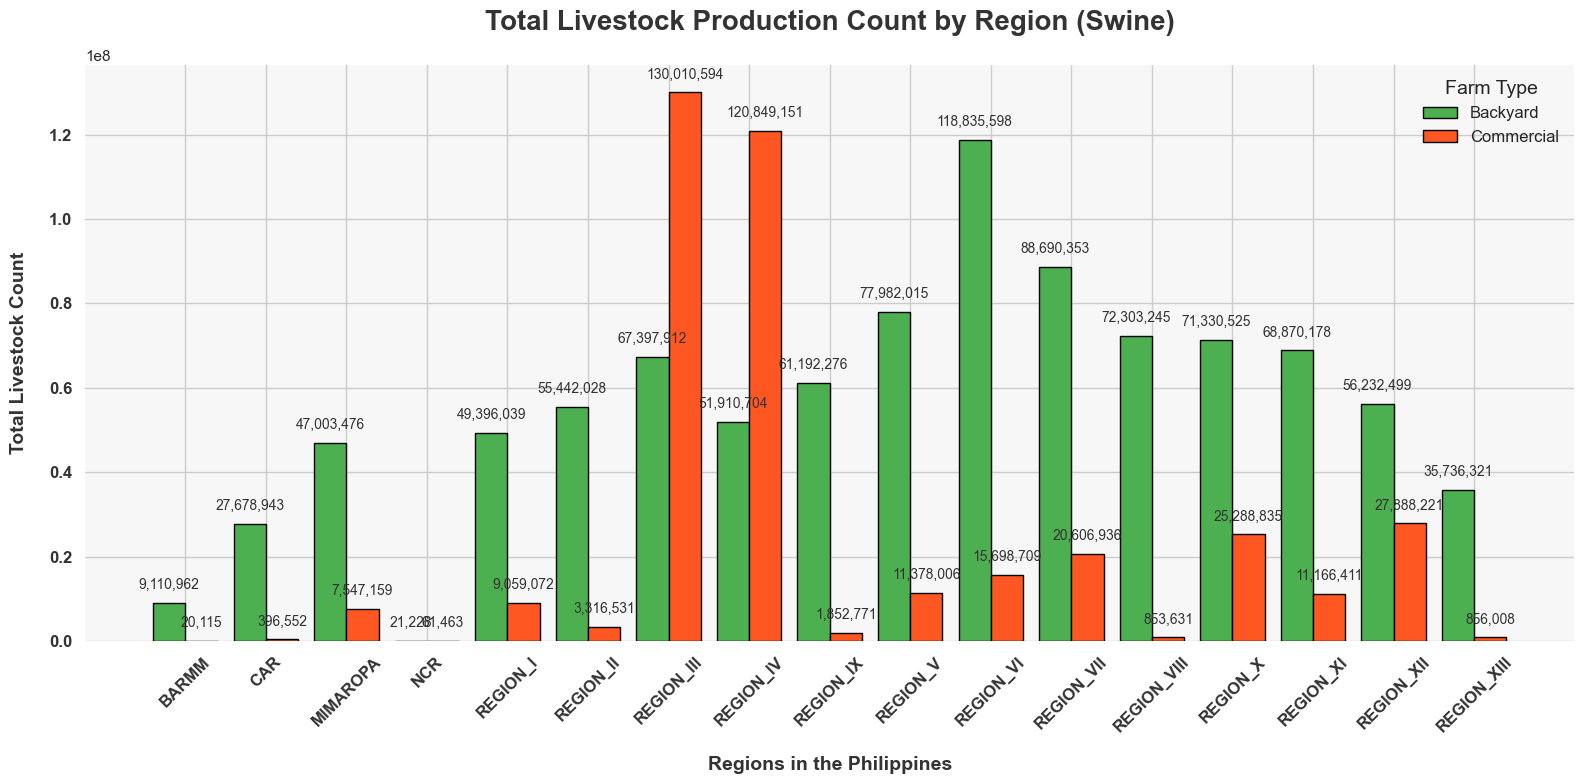

In [71]:
grouped_livestock = swine_filtered.groupby(['REGION', 'FARM_TYPE'], as_index=False).agg(
    LIVESTOCK_COUNT=('LIVESTOCK_COUNT', 'sum')
)

pivoted_livestock = grouped_livestock.pivot(
    index='REGION', 
    columns='FARM_TYPE', 
    values='LIVESTOCK_COUNT'
).reset_index()

# Set a modern style
sns.set_theme(style="whitegrid")

# Define a custom color palette
backyard_color = "#4CAF50"  # Soft green for Backyard
commercial_color = "#FF5722"  # Warm orange for Commercial
background_color = "#f7f7f7"  # Light gray for the background

# Create the figure
plt.figure(figsize=(16, 8))
plt.gca().set_facecolor(background_color)  # Set the background color

width = 0.4  # Width of each bar

# Define the positions for Backyard and Commercial bars
x = range(len(pivoted_livestock['REGION']))
plt.bar(
    [pos - width / 2 for pos in x], 
    pivoted_livestock['Backyard'], 
    width=width, 
    label='Backyard', 
    color=backyard_color,
    edgecolor='black'
)
plt.bar(
    [pos + width / 2 for pos in x], 
    pivoted_livestock['Commercial'], 
    width=width, 
    label='Commercial', 
    color=commercial_color,
    edgecolor='black'
)

# Add labels and title with improved formatting
plt.title(
    'Total Livestock Production Count by Region (Swine)', 
    fontsize=20, 
    weight='bold', 
    pad=25, 
    color="#333333"  # Dark gray for the title text
)

# Bold x and y labels
plt.xlabel(
    'Regions in the Philippines', 
    fontsize=14, 
    labelpad=15, 
    weight='bold',  # Make x-label bold
    color="#333333"
)
plt.ylabel(
    'Total Livestock Count', 
    fontsize=14, 
    labelpad=15, 
    weight='bold',  # Make y-label bold
    color="#333333"
)

# Bold x and y ticks
plt.xticks(
    x, 
    pivoted_livestock['REGION'], 
    rotation=45, 
    fontsize=12, 
    fontweight='bold',  # Make x-ticks bold
    color="#333333"
)
plt.yticks(
    fontsize=12, 
    fontweight='bold',  # Make y-ticks bold
    color="#333333"
)

# Add values on top of the bars
for i, pos in enumerate(x):
    # Backyard values
    plt.text(
        pos - width / 2, 
        pivoted_livestock['Backyard'][i] + 0.02 * max(grouped_livestock['LIVESTOCK_COUNT']),
        f"{pivoted_livestock['Backyard'][i]:,.0f}", 
        ha='center', 
        va='bottom', 
        fontsize=10, 
        color="#333333"
    )
    # Commercial values
    plt.text(
        pos + width / 2, 
        pivoted_livestock['Commercial'][i] + 0.02 * max(grouped_livestock['LIVESTOCK_COUNT']),
        f"{pivoted_livestock['Commercial'][i]:,.0f}", 
        ha='center', 
        va='bottom', 
        fontsize=10, 
        color="#333333"
    )

# Add a legend for clarity
plt.legend(
    title='Farm Type', 
    fontsize=12, 
    title_fontsize=14, 
    loc='upper right', 
    frameon=False
)

# Remove unnecessary spines for a cleaner look
sns.despine(left=True, bottom=True)

# Ensure layout fits nicely
plt.tight_layout()

# Show the plot
plt.show()

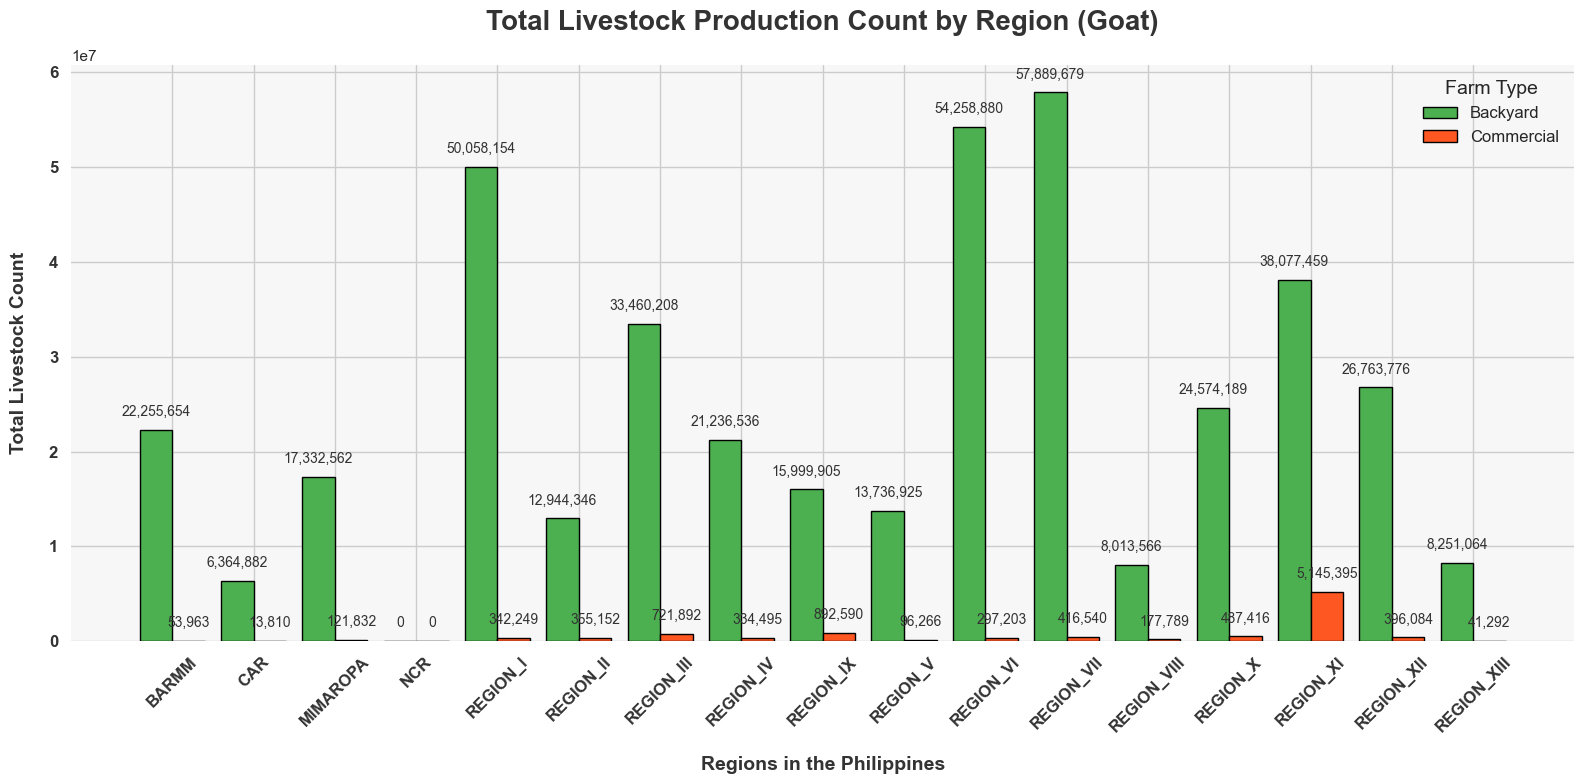

In [72]:
grouped_livestock = goat_filtered.groupby(['REGION', 'FARM_TYPE'], as_index=False).agg(
    LIVESTOCK_COUNT=('LIVESTOCK_COUNT', 'sum')
)

pivoted_livestock = grouped_livestock.pivot(
    index='REGION', 
    columns='FARM_TYPE', 
    values='LIVESTOCK_COUNT'
).reset_index()

# Set a modern style
sns.set_theme(style="whitegrid")

# Define a custom color palette
backyard_color = "#4CAF50"  # Soft green for Backyard
commercial_color = "#FF5722"  # Warm orange for Commercial
background_color = "#f7f7f7"  # Light gray for the background

# Create the figure
plt.figure(figsize=(16, 8))
plt.gca().set_facecolor(background_color)  # Set the background color

width = 0.4  # Width of each bar

# Define the positions for Backyard and Commercial bars
x = range(len(pivoted_livestock['REGION']))
plt.bar(
    [pos - width / 2 for pos in x], 
    pivoted_livestock['Backyard'], 
    width=width, 
    label='Backyard', 
    color=backyard_color,
    edgecolor='black'
)
plt.bar(
    [pos + width / 2 for pos in x], 
    pivoted_livestock['Commercial'], 
    width=width, 
    label='Commercial', 
    color=commercial_color,
    edgecolor='black'
)

# Add labels and title with improved formatting
plt.title(
    'Total Livestock Production Count by Region (Goat)', 
    fontsize=20, 
    weight='bold', 
    pad=25, 
    color="#333333"  # Dark gray for the title text
)

# Bold x and y labels
plt.xlabel(
    'Regions in the Philippines', 
    fontsize=14, 
    labelpad=15, 
    weight='bold',  # Make x-label bold
    color="#333333"
)
plt.ylabel(
    'Total Livestock Count', 
    fontsize=14, 
    labelpad=15, 
    weight='bold',  # Make y-label bold
    color="#333333"
)

# Bold x and y ticks
plt.xticks(
    x, 
    pivoted_livestock['REGION'], 
    rotation=45, 
    fontsize=12, 
    fontweight='bold',  # Make x-ticks bold
    color="#333333"
)
plt.yticks(
    fontsize=12, 
    fontweight='bold',  # Make y-ticks bold
    color="#333333"
)

# Add values on top of the bars
for i, pos in enumerate(x):
    # Backyard values
    plt.text(
        pos - width / 2, 
        pivoted_livestock['Backyard'][i] + 0.02 * max(grouped_livestock['LIVESTOCK_COUNT']),
        f"{pivoted_livestock['Backyard'][i]:,.0f}", 
        ha='center', 
        va='bottom', 
        fontsize=10, 
        color="#333333"
    )
    # Commercial values
    plt.text(
        pos + width / 2, 
        pivoted_livestock['Commercial'][i] + 0.02 * max(grouped_livestock['LIVESTOCK_COUNT']),
        f"{pivoted_livestock['Commercial'][i]:,.0f}", 
        ha='center', 
        va='bottom', 
        fontsize=10, 
        color="#333333"
    )

# Add a legend for clarity
plt.legend(
    title='Farm Type', 
    fontsize=12, 
    title_fontsize=14, 
    loc='upper right', 
    frameon=False
)

# Remove unnecessary spines for a cleaner look
sns.despine(left=True, bottom=True)

# Ensure layout fits nicely
plt.tight_layout()

# Show the plot
plt.show()

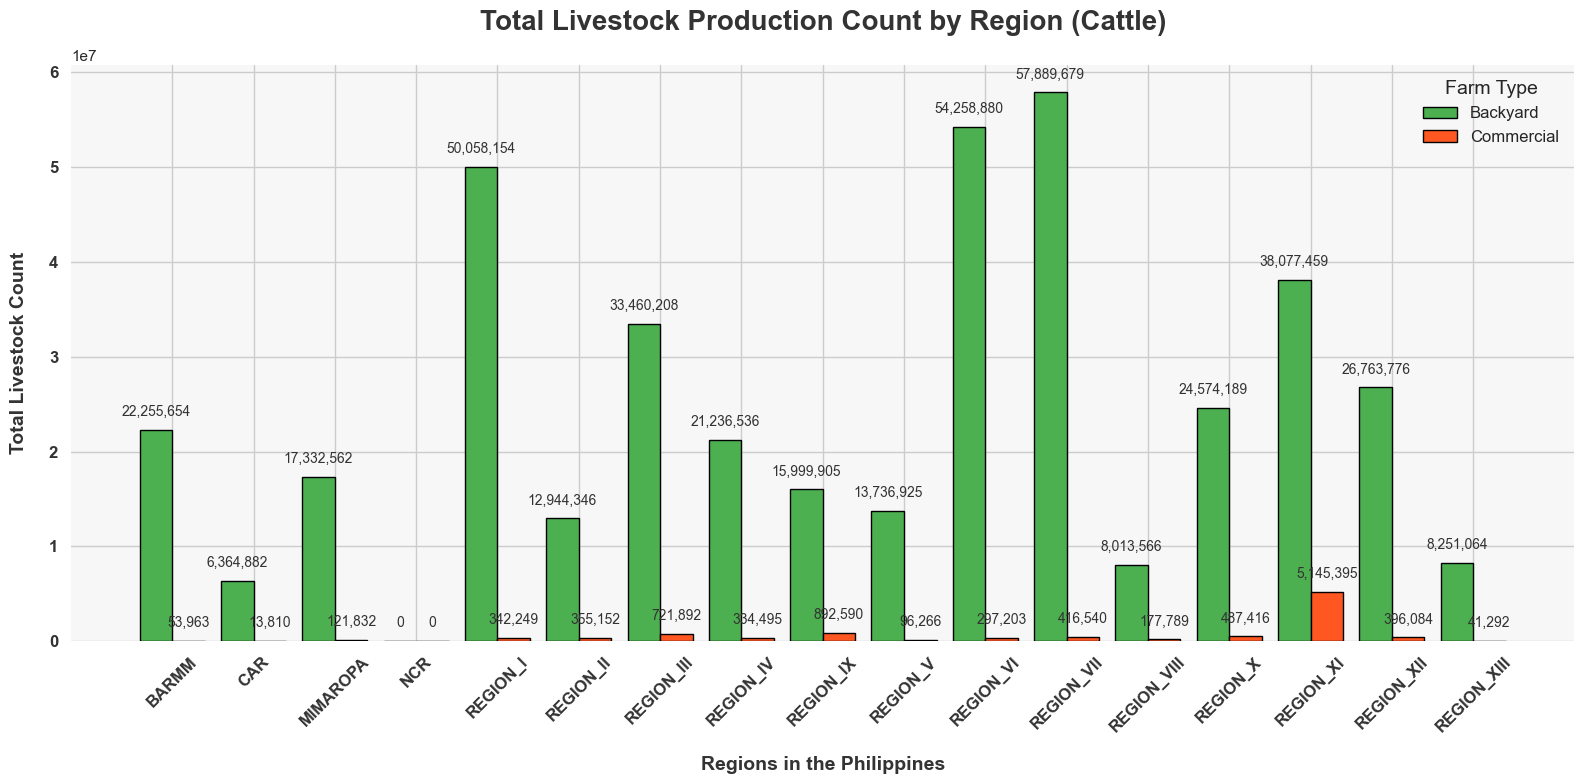

In [73]:
grouped_livestock = cattle_filtered.groupby(['REGION', 'FARM_TYPE'], as_index=False).agg(
    LIVESTOCK_COUNT=('LIVESTOCK_COUNT', 'sum')
)

pivoted_livestock = grouped_livestock.pivot(
    index='REGION', 
    columns='FARM_TYPE', 
    values='LIVESTOCK_COUNT'
).reset_index()

# Set a modern style
sns.set_theme(style="whitegrid")

# Define a custom color palette
backyard_color = "#4CAF50"  # Soft green for Backyard
commercial_color = "#FF5722"  # Warm orange for Commercial
background_color = "#f7f7f7"  # Light gray for the background

# Create the figure
plt.figure(figsize=(16, 8))
plt.gca().set_facecolor(background_color)  # Set the background color

width = 0.4  # Width of each bar

# Define the positions for Backyard and Commercial bars
x = range(len(pivoted_livestock['REGION']))
plt.bar(
    [pos - width / 2 for pos in x], 
    pivoted_livestock['Backyard'], 
    width=width, 
    label='Backyard', 
    color=backyard_color,
    edgecolor='black'
)
plt.bar(
    [pos + width / 2 for pos in x], 
    pivoted_livestock['Commercial'], 
    width=width, 
    label='Commercial', 
    color=commercial_color,
    edgecolor='black'
)

# Add labels and title with improved formatting
plt.title(
    'Total Livestock Production Count by Region (Cattle)', 
    fontsize=20, 
    weight='bold', 
    pad=25, 
    color="#333333"  # Dark gray for the title text
)

# Bold x and y labels
plt.xlabel(
    'Regions in the Philippines', 
    fontsize=14, 
    labelpad=15, 
    weight='bold',  # Make x-label bold
    color="#333333"
)
plt.ylabel(
    'Total Livestock Count', 
    fontsize=14, 
    labelpad=15, 
    weight='bold',  # Make y-label bold
    color="#333333"
)

# Bold x and y ticks
plt.xticks(
    x, 
    pivoted_livestock['REGION'], 
    rotation=45, 
    fontsize=12, 
    fontweight='bold',  # Make x-ticks bold
    color="#333333"
)
plt.yticks(
    fontsize=12, 
    fontweight='bold',  # Make y-ticks bold
    color="#333333"
)

# Add values on top of the bars
for i, pos in enumerate(x):
    # Backyard values
    plt.text(
        pos - width / 2, 
        pivoted_livestock['Backyard'][i] + 0.02 * max(grouped_livestock['LIVESTOCK_COUNT']),
        f"{pivoted_livestock['Backyard'][i]:,.0f}", 
        ha='center', 
        va='bottom', 
        fontsize=10, 
        color="#333333"
    )
    # Commercial values
    plt.text(
        pos + width / 2, 
        pivoted_livestock['Commercial'][i] + 0.02 * max(grouped_livestock['LIVESTOCK_COUNT']),
        f"{pivoted_livestock['Commercial'][i]:,.0f}", 
        ha='center', 
        va='bottom', 
        fontsize=10, 
        color="#333333"
    )

# Add a legend for clarity
plt.legend(
    title='Farm Type', 
    fontsize=12, 
    title_fontsize=14, 
    loc='upper right', 
    frameon=False
)

# Remove unnecessary spines for a cleaner look
sns.despine(left=True, bottom=True)

# Ensure layout fits nicely
plt.tight_layout()

# Show the plot
plt.show()

#### ➡️ Visualizing through Line Graph

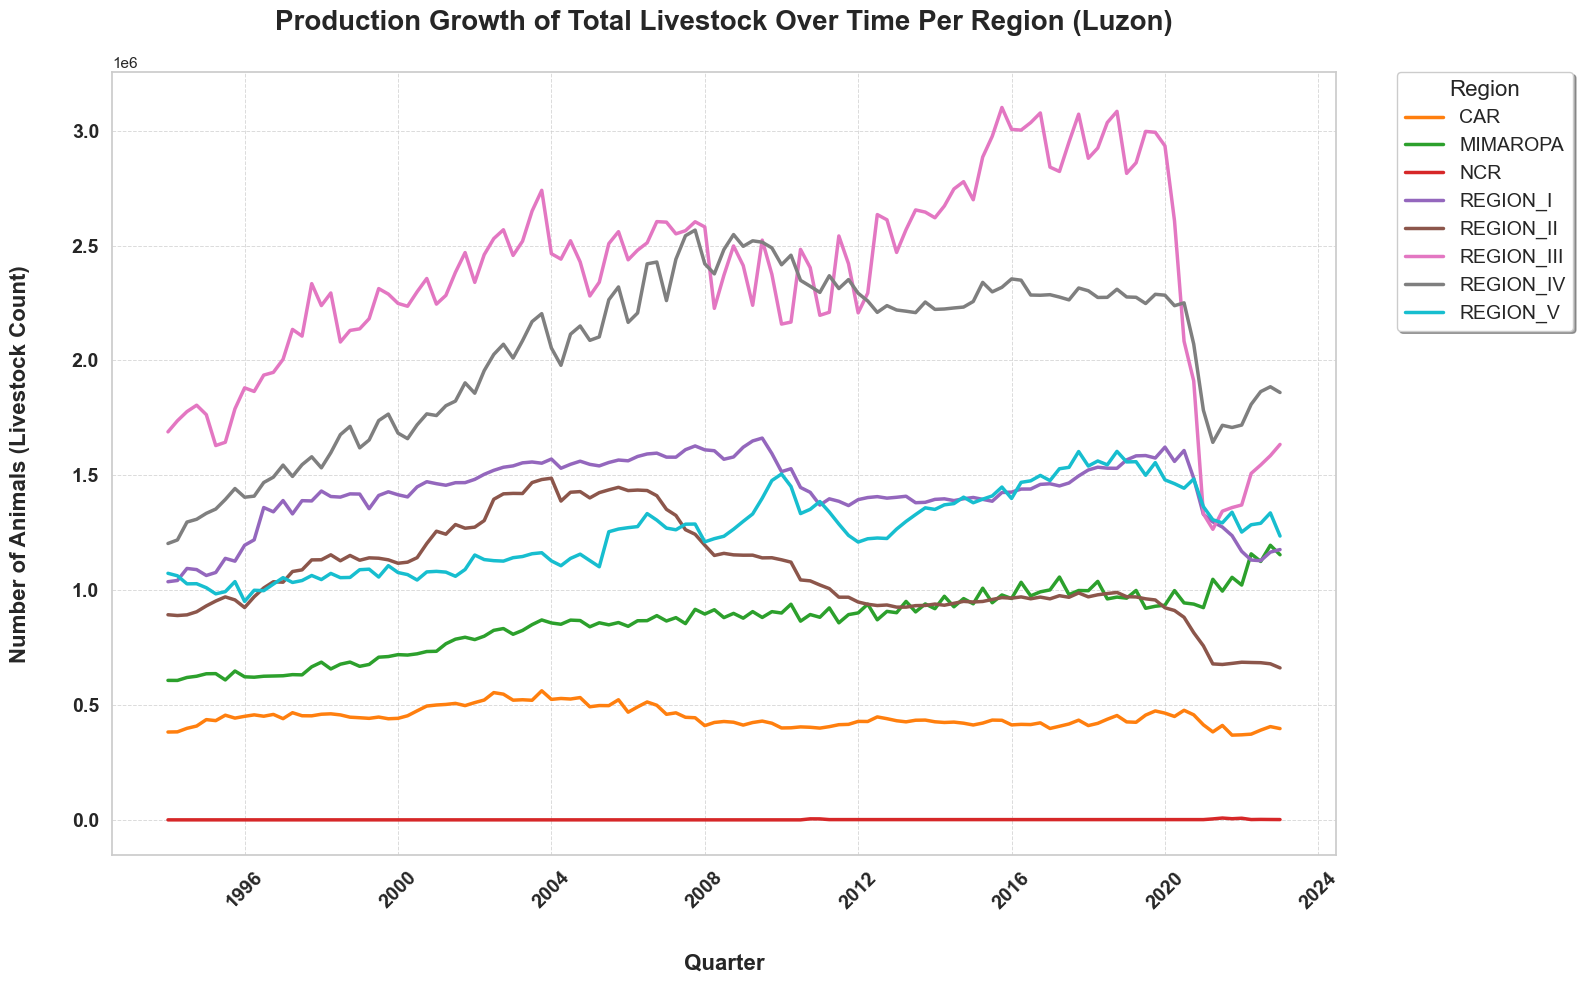

In [74]:
# Group by Quarter and Animal Type
grouped_data = melted_livestock.groupby(['QUARTER', 'REGION'])['LIVESTOCK_COUNT'].sum().reset_index()

# Filter for Luzon regions
luzon_regions = ['NCR', 'CAR', 'REGION_I', 'REGION_II', 'REGION_III', 'REGION_IV', 'MIMAROPA', 'REGION_V']
grouped_data_luzon = grouped_data[grouped_data['REGION'].isin(luzon_regions)]

# Set style for the plot
sns.set_style("whitegrid")
palette = sns.color_palette("tab10")  # Distinct, recognizable colors

# Create the plot
plt.figure(figsize=(16, 10))
sns.lineplot(
    data=grouped_data_luzon, 
    x='QUARTER', 
    y='LIVESTOCK_COUNT', 
    hue='REGION', 
    palette=palette, 
    linewidth=2.5
)

# Customize the title and labels (bold text and added padding)
plt.title('Production Growth of Total Livestock Over Time Per Region (Luzon)', fontsize=20, fontweight='bold', pad=30)
plt.xlabel('Quarter', fontsize=16, fontweight='bold', labelpad=30)
plt.ylabel('Number of Animals (Livestock Count)', fontsize=16, fontweight='bold', labelpad=30)

# Bold the tick labels and adjust size
plt.xticks(fontsize=14, fontweight='bold', rotation=45)
plt.yticks(fontsize=14, fontweight='bold')

# Customize the legend
# Get current handles and labels from the plot
handles, labels = plt.gca().get_legend_handles_labels()

# Filter the handles and labels based on Luzon regions
filtered_handles = [handle for handle, label in zip(handles, labels) if label in luzon_regions]
filtered_labels = [label for label in labels if label in luzon_regions]

# Manually set the filtered handles and labels
plt.legend(
    handles=filtered_handles,
    labels=filtered_labels,
    title='Region',
    fontsize=14, 
    title_fontsize=16, 
    bbox_to_anchor=(1.05, 1), 
    loc='upper left',
    borderaxespad=0.0, 
    frameon=True,
    shadow=True
)

# Enhance the gridlines
plt.grid(visible=True, linestyle='--', linewidth=0.7, alpha=0.7)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

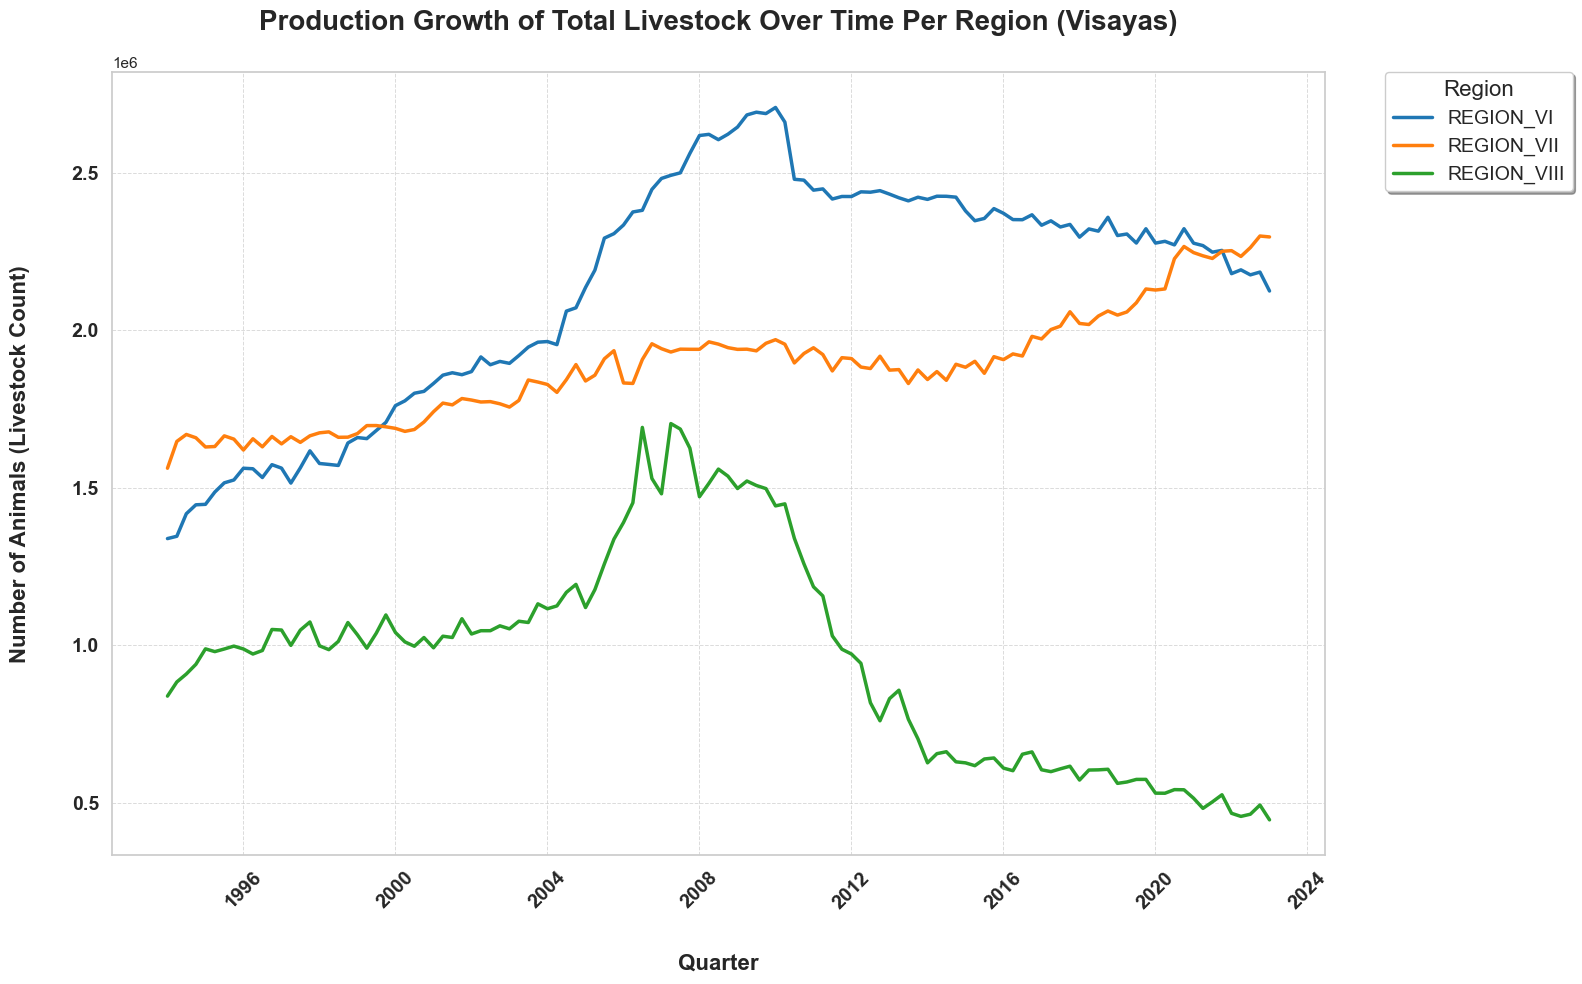

In [75]:
# Group by Quarter and Animal Type
grouped_data = melted_livestock.groupby(['QUARTER', 'REGION'])['LIVESTOCK_COUNT'].sum().reset_index()

# Filter for Luzon regions
visayas_regions = ['REGION_VI', 'REGION_VII', 'REGION_VIII']
grouped_data_visayas = grouped_data[grouped_data['REGION'].isin(visayas_regions)]

# Set style for the plot
sns.set_style("whitegrid")
palette = sns.color_palette("tab10")  # Distinct, recognizable colors

# Create the plot
plt.figure(figsize=(16, 10))
sns.lineplot(
    data=grouped_data_visayas, 
    x='QUARTER', 
    y='LIVESTOCK_COUNT', 
    hue='REGION', 
    palette=palette, 
    linewidth=2.5
)

# Customize the title and labels (bold text and added padding)
plt.title('Production Growth of Total Livestock Over Time Per Region (Visayas)', fontsize=20, fontweight='bold', pad=30)
plt.xlabel('Quarter', fontsize=16, fontweight='bold', labelpad=30)
plt.ylabel('Number of Animals (Livestock Count)', fontsize=16, fontweight='bold', labelpad=30)

# Bold the tick labels and adjust size
plt.xticks(fontsize=14, fontweight='bold', rotation=45)
plt.yticks(fontsize=14, fontweight='bold')

# Customize the legend
# Get current handles and labels from the plot
handles, labels = plt.gca().get_legend_handles_labels()

# Filter the handles and labels based on Luzon regions
filtered_handles = [handle for handle, label in zip(handles, labels) if label in visayas_regions]
filtered_labels = [label for label in labels if label in visayas_regions]

# Manually set the filtered handles and labels
plt.legend(
    handles=filtered_handles,
    labels=filtered_labels,
    title='Region',
    fontsize=14, 
    title_fontsize=16, 
    bbox_to_anchor=(1.05, 1), 
    loc='upper left',
    borderaxespad=0.0, 
    frameon=True,
    shadow=True
)

# Enhance the gridlines
plt.grid(visible=True, linestyle='--', linewidth=0.7, alpha=0.7)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

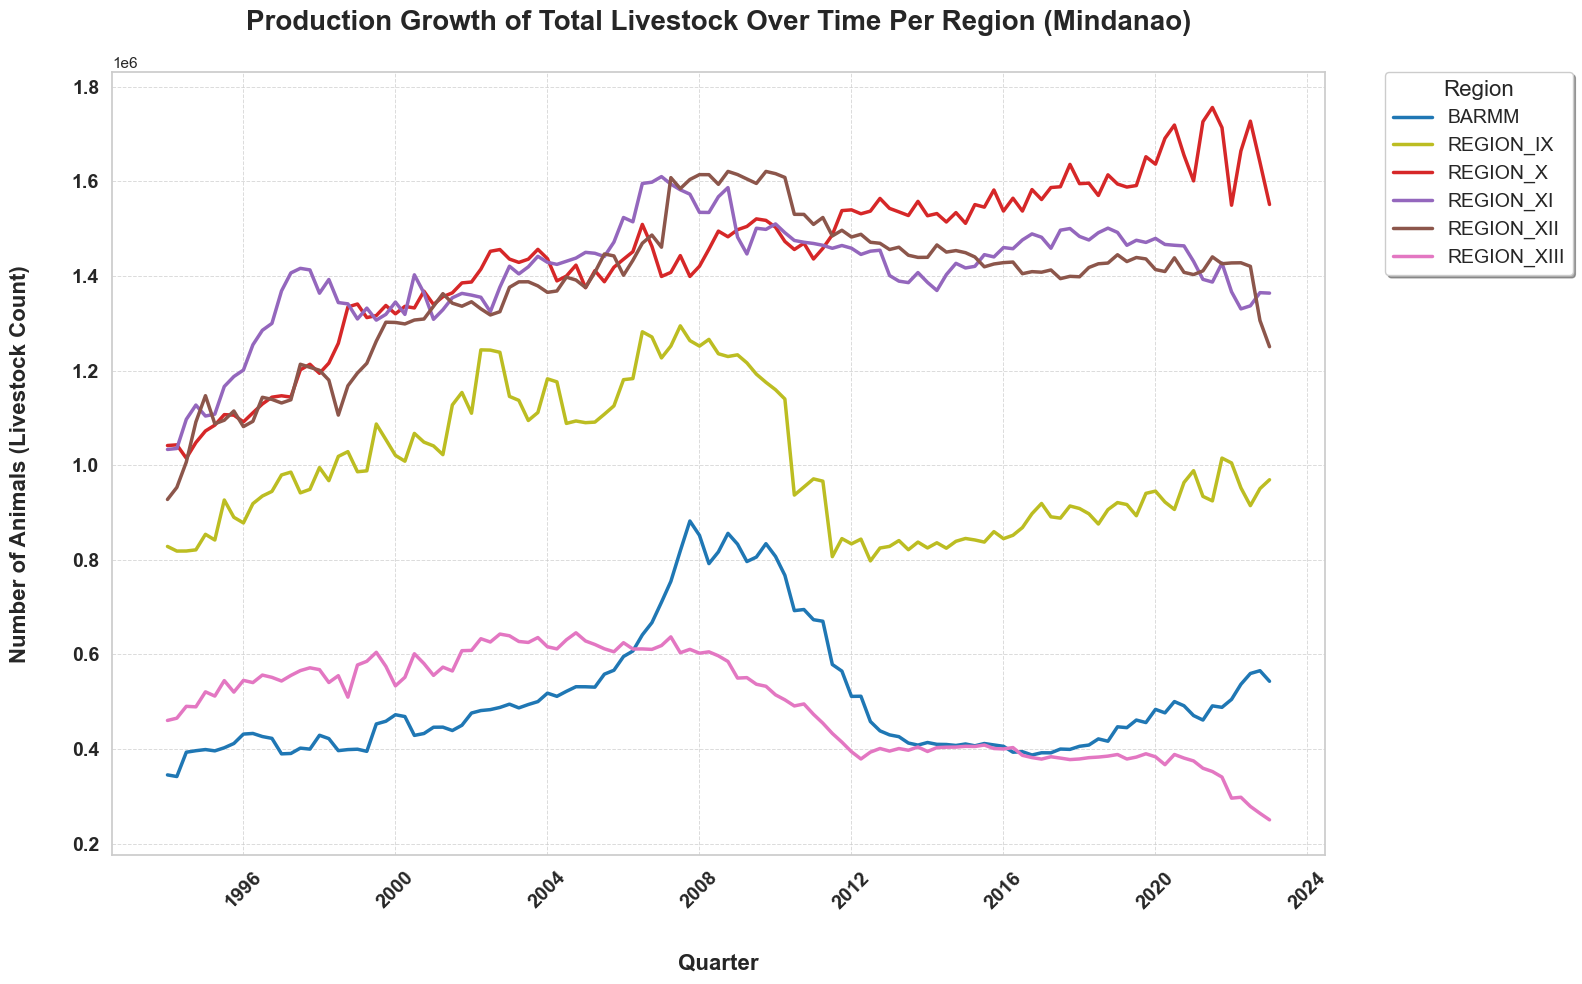

In [76]:
# Group by Quarter and Animal Type
grouped_data = melted_livestock.groupby(['QUARTER', 'REGION'])['LIVESTOCK_COUNT'].sum().reset_index()

# Filter for Luzon regions
mindanao_regions = ['REGION_IX', 'REGION_X', 'REGION_XI', 'REGION_XII', 'REGION_XIII', 'BARMM']
grouped_data_mindanao = grouped_data[grouped_data['REGION'].isin(mindanao_regions)]

# Set style for the plot
sns.set_style("whitegrid")
palette = sns.color_palette("tab10")  # Distinct, recognizable colors

# Create the plot
plt.figure(figsize=(16, 10))
sns.lineplot(
    data=grouped_data_mindanao, 
    x='QUARTER', 
    y='LIVESTOCK_COUNT', 
    hue='REGION', 
    palette=palette, 
    linewidth=2.5
)

# Customize the title and labels (bold text and added padding)
plt.title('Production Growth of Total Livestock Over Time Per Region (Mindanao)', fontsize=20, fontweight='bold', pad=30)
plt.xlabel('Quarter', fontsize=16, fontweight='bold', labelpad=30)
plt.ylabel('Number of Animals (Livestock Count)', fontsize=16, fontweight='bold', labelpad=30)

# Bold the tick labels and adjust size
plt.xticks(fontsize=14, fontweight='bold', rotation=45)
plt.yticks(fontsize=14, fontweight='bold')

# Customize the legend
# Get current handles and labels from the plot
handles, labels = plt.gca().get_legend_handles_labels()

# Filter the handles and labels based on Luzon regions
filtered_handles = [handle for handle, label in zip(handles, labels) if label in mindanao_regions]
filtered_labels = [label for label in labels if label in mindanao_regions]

# Manually set the filtered handles and labels
plt.legend(
    handles=filtered_handles,
    labels=filtered_labels,
    title='Region',
    fontsize=14, 
    title_fontsize=16, 
    bbox_to_anchor=(1.05, 1), 
    loc='upper left',
    borderaxespad=0.0, 
    frameon=True,
    shadow=True
)

# Enhance the gridlines
plt.grid(visible=True, linestyle='--', linewidth=0.7, alpha=0.7)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

#### ➡️ Visualizing through Box Plot

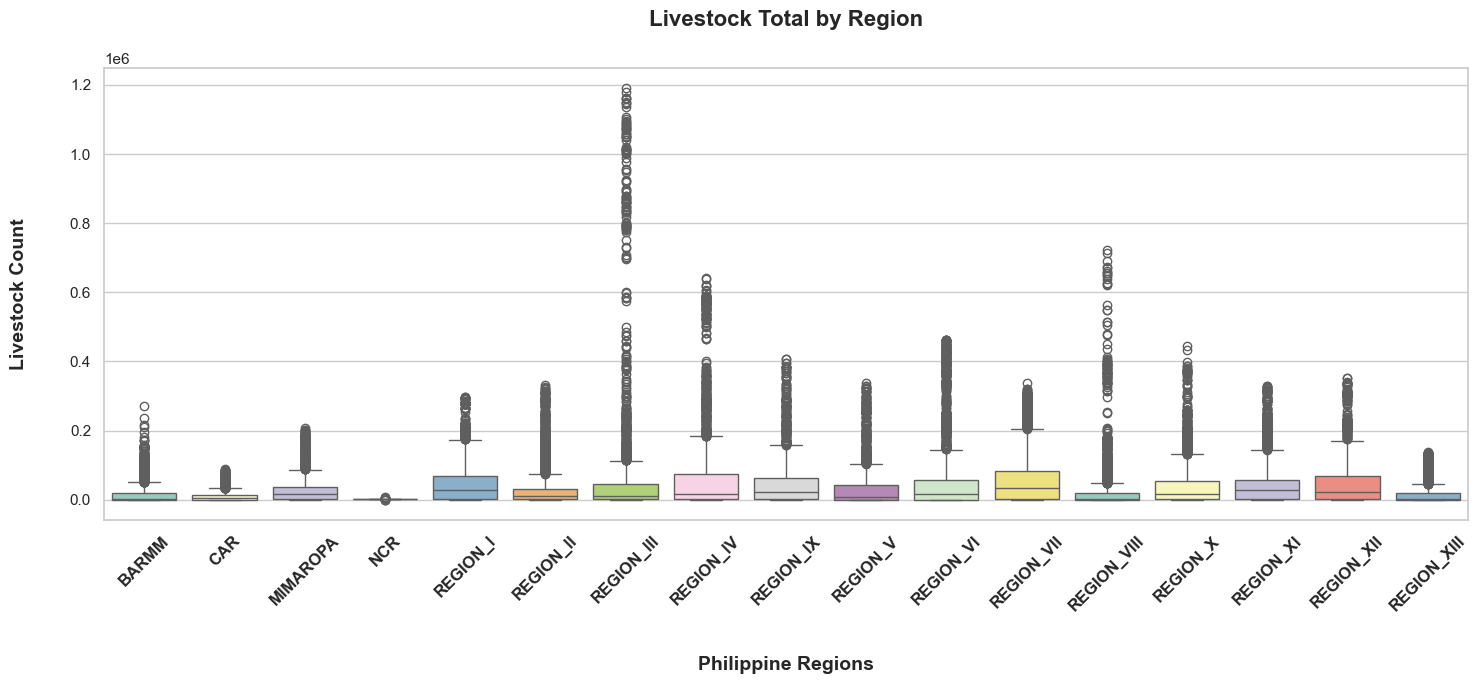

In [77]:
plt.figure(figsize=(15, 7))
sns.boxplot(x='REGION', y='LIVESTOCK_COUNT', data=melted_livestock, palette='Set3')
plt.title('Livestock Total by Region', fontsize=16, pad=30, fontweight='bold')
plt.xlabel('Philippine Regions', fontsize=14, labelpad=30, fontweight='bold')
plt.ylabel('Livestock Count', fontsize=14, labelpad=30, fontweight='bold')
plt.xticks(rotation=45, fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()


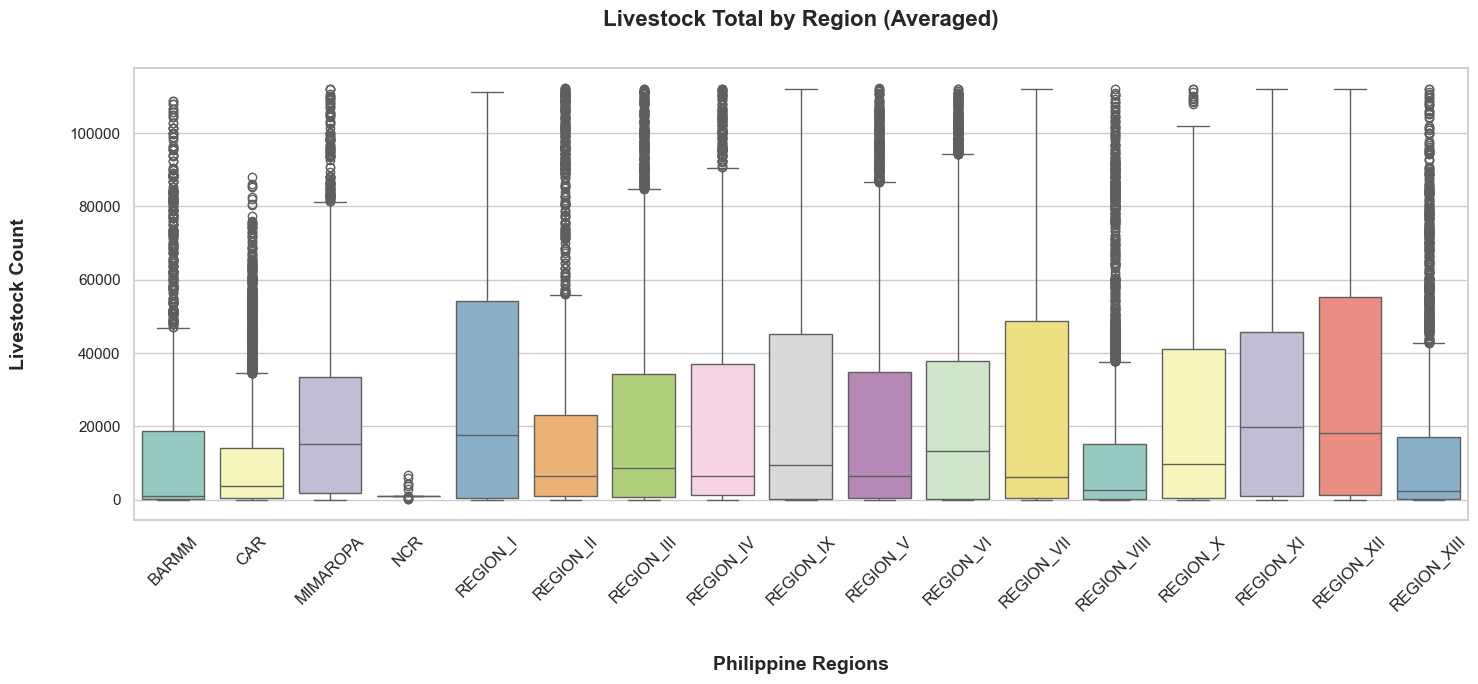

In [78]:
# Calculate IQR for LIVESTOCK_COUNT
Q1 = melted_livestock['LIVESTOCK_COUNT'].quantile(0.25)
Q3 = melted_livestock['LIVESTOCK_COUNT'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for non-outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter for non-outliers
non_outliers = melted_livestock[
    (melted_livestock['LIVESTOCK_COUNT'] >= lower_bound) &
    (melted_livestock['LIVESTOCK_COUNT'] <= upper_bound)
]

plt.figure(figsize=(15, 7))
sns.boxplot(x='REGION', y='LIVESTOCK_COUNT', data=non_outliers, palette='Set3')
plt.title('Livestock Total by Region (Averaged)', fontsize=16, pad=30, fontweight='bold')
plt.xlabel('Philippine Regions', fontsize=14, labelpad=30, fontweight='bold')
plt.ylabel('Livestock Count', fontsize=14, labelpad=30, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

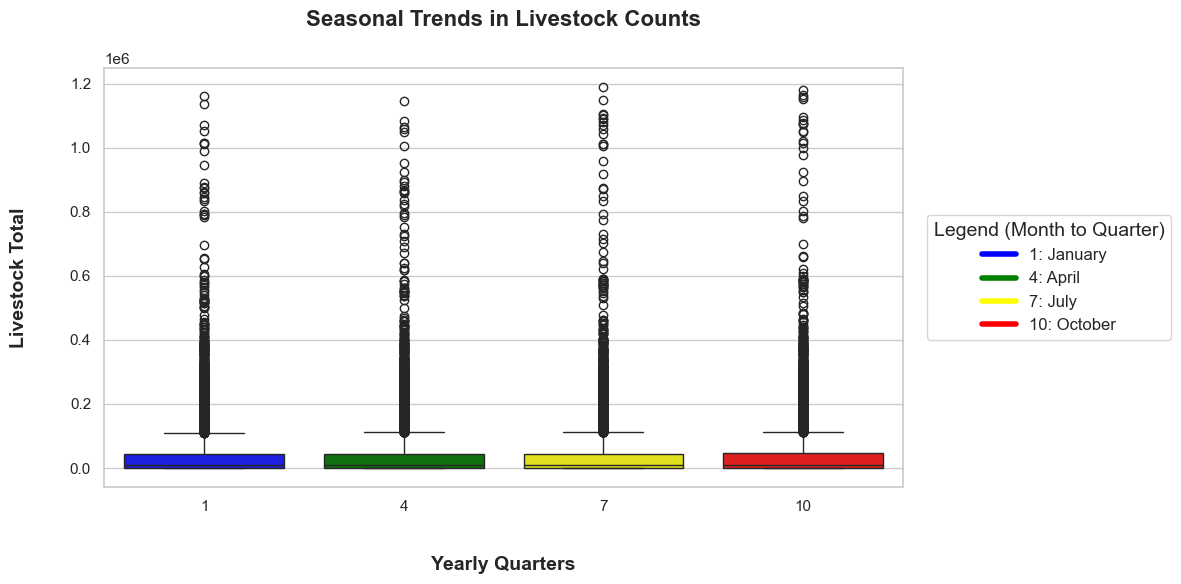

In [79]:
from matplotlib.lines import Line2D

# Set the specific colors for the boxes (blue, green, yellow, red)
box_colors = ['blue', 'green', 'yellow', 'red']

plt.figure(figsize=(12, 6))

sns.boxplot(
    x=melted_livestock['QUARTER'].dt.month, 
    y='LIVESTOCK_COUNT', 
    data=melted_livestock, 
    palette=box_colors
)

plt.title('Seasonal Trends in Livestock Counts', fontsize=16, pad=30, fontweight='bold')
plt.xlabel('Yearly Quarters', fontsize=14, labelpad=30, fontweight='bold')
plt.ylabel('Livestock Total', fontsize=14, labelpad=30, fontweight='bold')

custom_lines = [
    Line2D([0], [0], color='blue', lw=4, label='1: January'),
    Line2D([0], [0], color='green', lw=4, label='4: April'),
    Line2D([0], [0], color='yellow', lw=4, label='7: July'),
    Line2D([0], [0], color='red', lw=4, label='10: October')
]

plt.legend(
    handles=custom_lines,
    title="Legend (Month to Quarter)",
    loc="center left",
    bbox_to_anchor=(1.02, 0.5),
    fontsize=12,
    title_fontsize=14
)

plt.tight_layout()
plt.show()

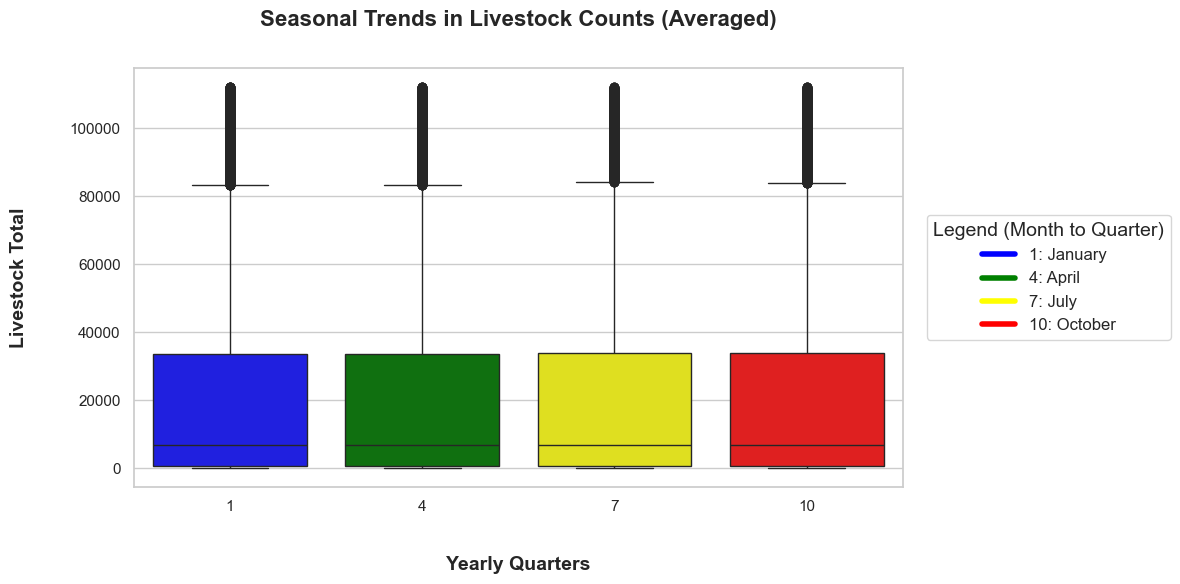

In [80]:
# Calculate IQR for LIVESTOCK_COUNT
Q1 = melted_livestock['LIVESTOCK_COUNT'].quantile(0.25)
Q3 = melted_livestock['LIVESTOCK_COUNT'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for non-outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter for non-outliers
non_outliers = melted_livestock[
    (melted_livestock['LIVESTOCK_COUNT'] >= lower_bound) &
    (melted_livestock['LIVESTOCK_COUNT'] <= upper_bound)
]

# Set the specific colors for the boxes (blue, green, yellow, red)
box_colors = ['blue', 'green', 'yellow', 'red']

plt.figure(figsize=(12, 6))

sns.boxplot(
    x=non_outliers['QUARTER'].dt.month, 
    y='LIVESTOCK_COUNT', 
    data=non_outliers, 
    palette=box_colors
)

plt.title('Seasonal Trends in Livestock Counts (Averaged)', fontsize=16, pad=30, fontweight='bold')
plt.xlabel('Yearly Quarters', fontsize=14, labelpad=30, fontweight='bold')
plt.ylabel('Livestock Total', fontsize=14, labelpad=30, fontweight='bold')

custom_lines = [
    Line2D([0], [0], color='blue', lw=4, label='1: January'),
    Line2D([0], [0], color='green', lw=4, label='4: April'),
    Line2D([0], [0], color='yellow', lw=4, label='7: July'),
    Line2D([0], [0], color='red', lw=4, label='10: October')
]

plt.legend(
    handles=custom_lines,
    title="Legend (Month to Quarter)",
    loc="center left",
    bbox_to_anchor=(1.02, 0.5), 
    fontsize=12,
    title_fontsize=14
)

plt.tight_layout()
plt.show()

#### ➡️ Visualizing through Scatter Plot

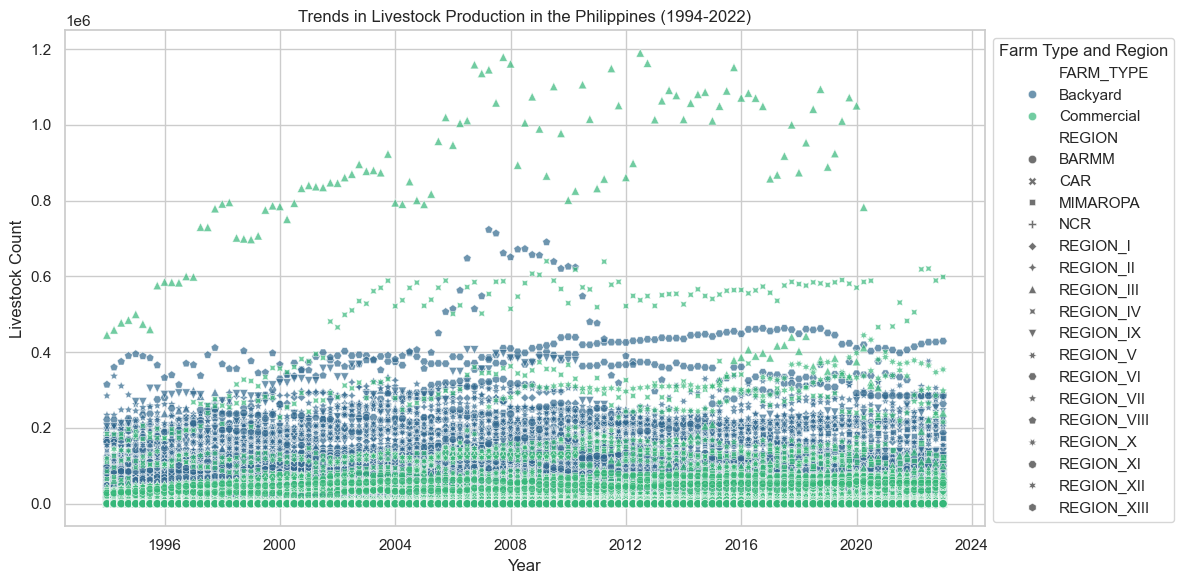

In [81]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=melted_livestock, x="QUARTER", y="LIVESTOCK_COUNT",
                hue="FARM_TYPE", style="REGION", palette="viridis", alpha=0.7)

plt.title("Trends in Livestock Production in the Philippines (1994-2022)")
plt.xlabel("Year")
plt.ylabel("Livestock Count")
plt.legend(title="Farm Type and Region", loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

## Part 2: Model Development

### Load and Prepare the Data

In [82]:
data = pd.read_csv('2E4FINL0_cleaned.csv')

In [83]:
print(data['REGION'].unique())

['NCR' 'CAR' 'REGION_I' 'REGION_II' 'REGION_III' 'REGION_IV' 'MIMAROPA'
 'REGION_V' 'REGION_VI' 'REGION_VII' 'REGION_VIII' 'REGION_IX' 'REGION_X'
 'REGION_XI' 'REGION_XII' 'REGION_XIII' 'BARMM']


Ensure that  `QUARTER` column is stored as a string, to treat it as a temporal datatype.

In [84]:
data['QUARTER'] = pd.to_datetime(data['QUARTER'])

In [85]:
region_data = data[data['REGION'] == 'CAR']

Group the data by each quarter and sum the `LIVESTOCK_COUNT` values to create a _single_ aggregated value for each quarter.

In [86]:
aggregated_data = region_data.groupby('QUARTER')['LIVESTOCK_COUNT'].sum()

Split into training (1994–2017) and testing (2018–2022).

In [87]:
train_data = aggregated_data[:'2017-12-31']
test_data = aggregated_data['2018-01-01':]

### SARIMA Model

In [88]:
sarima_model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(2, 2, 8, 4))
sarima_fit = sarima_model.fit(disp=False)
print(sarima_fit.summary())

                                                SARIMAX Results                                                 
Dep. Variable:                                          LIVESTOCK_COUNT   No. Observations:                   96
Model:             SARIMAX(1, 1, 1)x(2, 2, [1, 2, 3, 4, 5, 6, 7, 8], 4)   Log Likelihood                -983.460
Date:                                                  Sat, 14 Dec 2024   AIC                           1992.921
Time:                                                          09:27:30   BIC                           2024.978
Sample:                                                      01-01-1994   HQIC                          2005.829
                                                           - 10-01-2017                                         
Covariance Type:                                                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------

#### Forecast for Test Period

In [89]:
forecast = sarima_fit.get_forecast(steps=len(test_data))
forecast_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()

### Evaluate the Model

In [90]:
rmse = np.sqrt(mean_squared_error(test_data, forecast_values))
print(f"RMSE: {rmse}")

RMSE: 44323.73560009302


In [91]:
naive_forecast = train_data[-1]
naive_rmse = np.sqrt(mean_squared_error(test_data, [naive_forecast] * len(test_data)))
print("Naive RMSE:", naive_rmse)

Naive RMSE: 35588.61745866293


#### Visualize Results

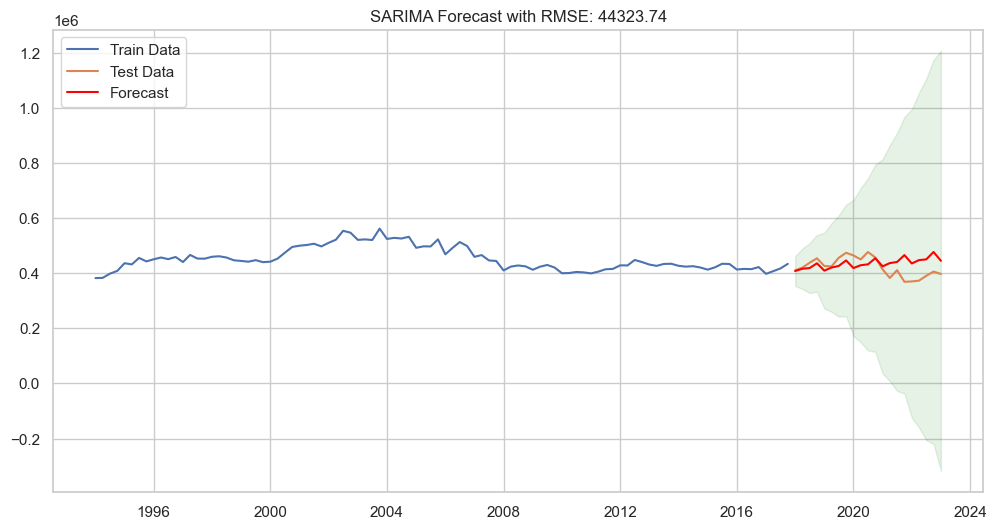

In [92]:
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Train Data')
plt.plot(test_data, label='Test Data')
plt.plot(forecast_values, label='Forecast', color='red')
plt.fill_between(test_data.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='green', alpha=0.1)
plt.legend(loc='upper left')
plt.title(f'SARIMA Forecast with RMSE: {rmse:.2f}')
plt.grid(True)
plt.show()

### Predict for the Next 5 Years

Forecast next 40 quarters.

In [93]:
future_forecast = sarima_fit.get_forecast(steps=40)
future_values = future_forecast.predicted_mean
future_ci = future_forecast.conf_int()

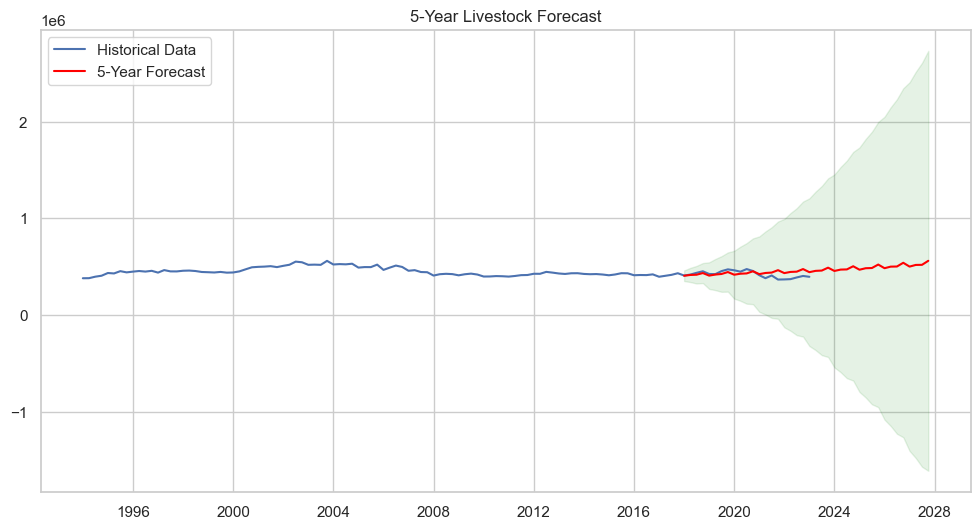

In [94]:
plt.figure(figsize=(12, 6))
plt.plot(aggregated_data, label='Historical Data')
plt.plot(future_values, label='5-Year Forecast', color='red')
plt.fill_between(future_values.index, future_ci.iloc[:, 0], future_ci.iloc[:, 1], color='green', alpha=0.1)
plt.legend(loc='upper left')
plt.title('5-Year Livestock Forecast')
plt.grid(True)
plt.show()

### Predict for the Next 5 Years: Regional Mapping

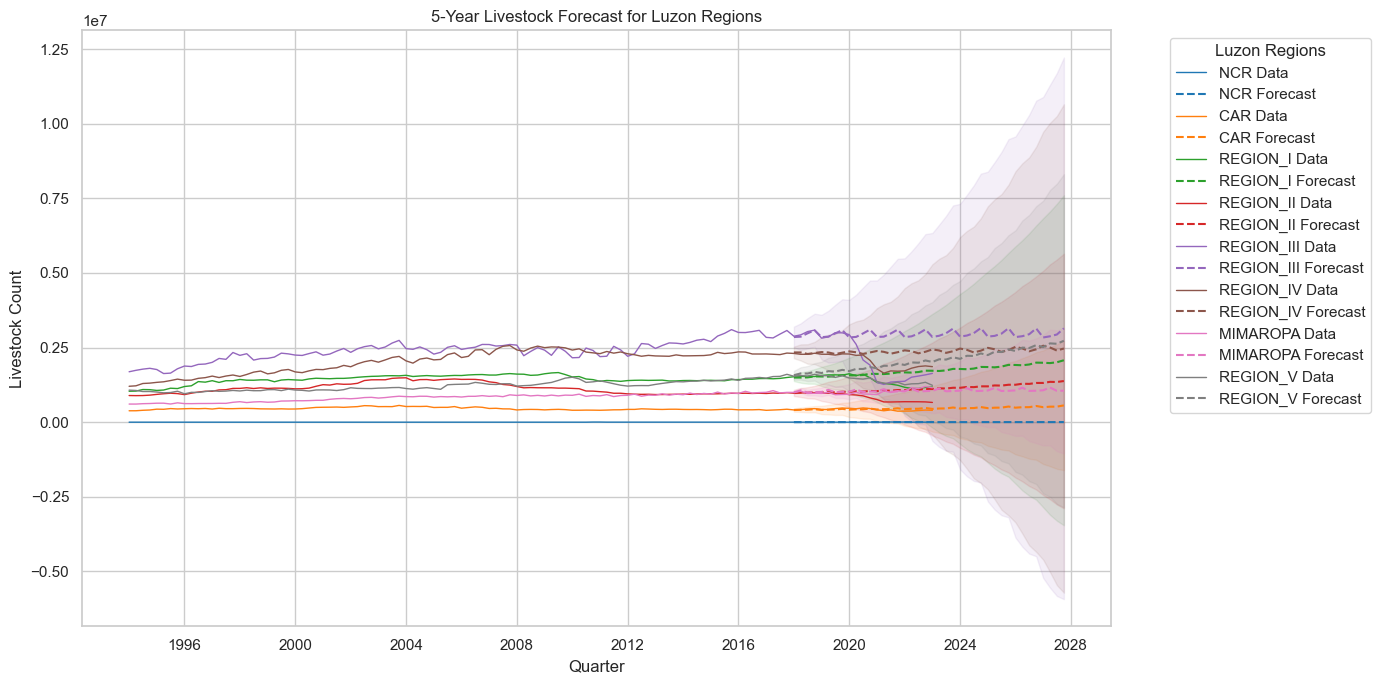

In [95]:
luzon_regions = [
    'NCR', 'CAR', 'REGION_I', 'REGION_II', 'REGION_III', 'REGION_IV',
    'MIMAROPA', 'REGION_V'
]

plt.figure(figsize=(14, 7))

colors = plt.cm.tab10.colors  # You can use any colormap, e.g., 'tab10', 'Set1', etc.

for i, region in enumerate(luzon_regions):
    region_data = data[data['REGION'] == region]
    aggregated_data = region_data.groupby('QUARTER')['LIVESTOCK_COUNT'].sum()

    train_data = aggregated_data[:'2017-12-31']
    test_data = aggregated_data['2018-01-01':]

    sarima_model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(2, 2, 8, 4))
    sarima_fit = sarima_model.fit(disp=False)

    future_forecast = sarima_fit.get_forecast(steps=40)
    future_values = future_forecast.predicted_mean
    future_ci = future_forecast.conf_int()

    color = colors[i % len(colors)]  # Cycle through the colormap

    plt.plot(aggregated_data, label=f'{region} Data', color=color, linewidth=1)

    plt.plot(future_values, label=f'{region} Forecast', color=color, linestyle='--', linewidth=1.5)

    plt.fill_between(
        future_values.index,
        future_ci.iloc[:, 0],
        future_ci.iloc[:, 1],
        color=color,
        alpha=0.1
    )

plt.title('5-Year Livestock Forecast for Luzon Regions')
plt.xlabel('Quarter')
plt.ylabel('Livestock Count')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title='Luzon Regions')
plt.grid(True)
plt.tight_layout()
plt.show()

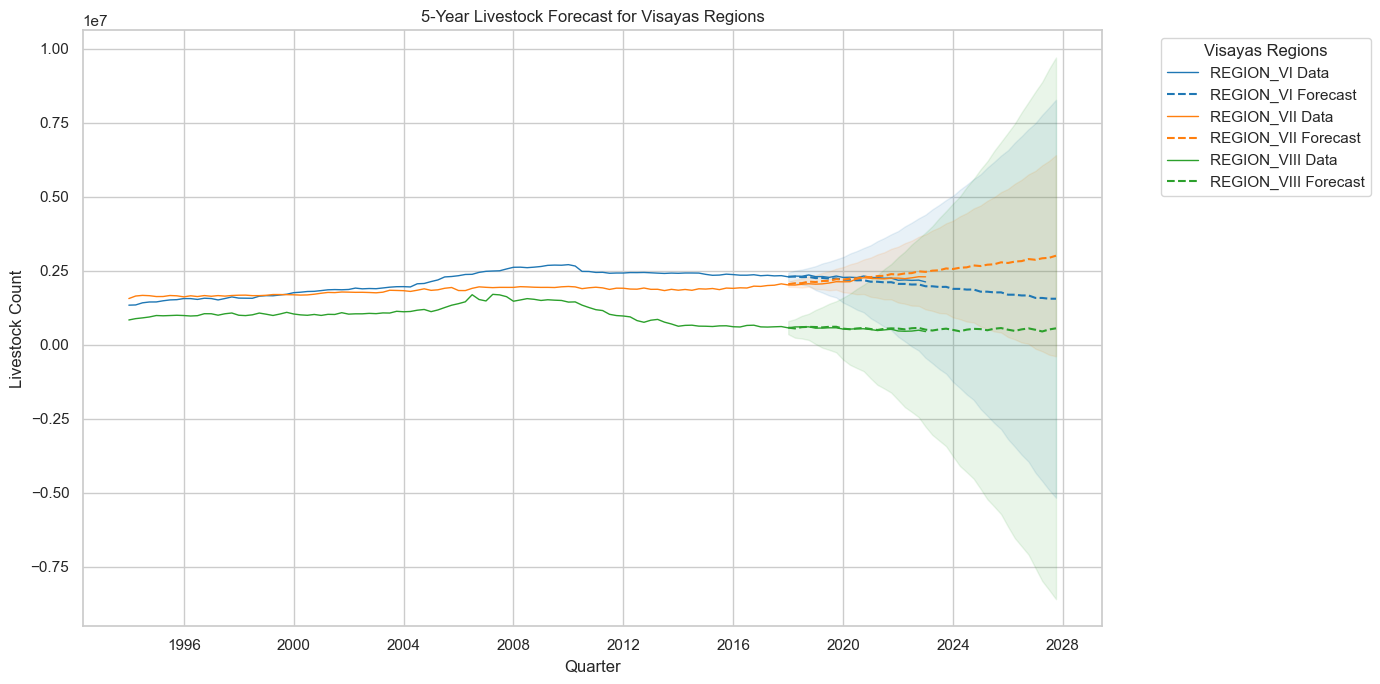

In [96]:
# Visayas regions
visayas_regions = ['REGION_VI', 'REGION_VII', 'REGION_VIII']

plt.figure(figsize=(14, 7))

colors = plt.cm.tab10.colors  # Use a colormap for consistent color cycling

for i, region in enumerate(visayas_regions):
    region_data = data[data['REGION'] == region]
    aggregated_data = region_data.groupby('QUARTER')['LIVESTOCK_COUNT'].sum()

    train_data = aggregated_data[:'2017-12-31']
    test_data = aggregated_data['2018-01-01':]

    sarima_model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(2, 2, 8, 4))
    sarima_fit = sarima_model.fit(disp=False)

    future_forecast = sarima_fit.get_forecast(steps=40)
    future_values = future_forecast.predicted_mean
    future_ci = future_forecast.conf_int()

    color = colors[i % len(colors)]  # Cycle through the colormap for each region

    # Plot historical data
    plt.plot(aggregated_data, label=f'{region} Data', color=color, linewidth=1)

    # Plot forecast with the same color
    plt.plot(future_values, label=f'{region} Forecast', color=color, linestyle='--', linewidth=1.5)

    # Plot confidence intervals
    plt.fill_between(
        future_values.index,
        future_ci.iloc[:, 0],
        future_ci.iloc[:, 1],
        color=color,
        alpha=0.1
    )

# Add plot details
plt.title('5-Year Livestock Forecast for Visayas Regions')
plt.xlabel('Quarter')
plt.ylabel('Livestock Count')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title='Visayas Regions')
plt.grid(True)
plt.tight_layout()
plt.show()

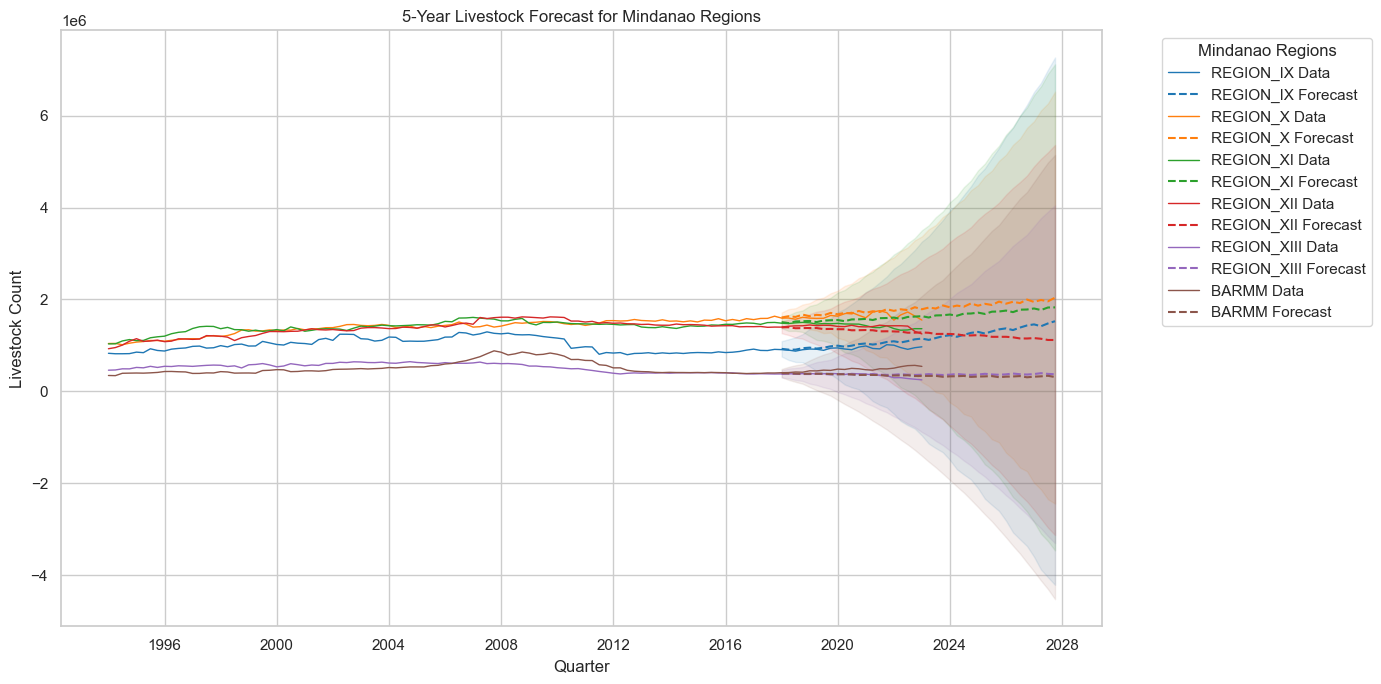

In [97]:
# Mindanao regions
mindanao_regions = ['REGION_IX', 'REGION_X', 'REGION_XI', 'REGION_XII', 'REGION_XIII', 'BARMM']

plt.figure(figsize=(14, 7))

colors = plt.cm.tab10.colors  # Use a colormap for consistent color cycling

for i, region in enumerate(mindanao_regions):
    region_data = data[data['REGION'] == region]
    aggregated_data = region_data.groupby('QUARTER')['LIVESTOCK_COUNT'].sum()

    train_data = aggregated_data[:'2017-12-31']
    test_data = aggregated_data['2018-01-01':]

    sarima_model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(2, 2, 8, 4))
    sarima_fit = sarima_model.fit(disp=False)

    future_forecast = sarima_fit.get_forecast(steps=40)
    future_values = future_forecast.predicted_mean
    future_ci = future_forecast.conf_int()

    color = colors[i % len(colors)]  # Cycle through the colormap for each region

    # Plot historical data
    plt.plot(aggregated_data, label=f'{region} Data', color=color, linewidth=1)

    # Plot forecast with the same color
    plt.plot(future_values, label=f'{region} Forecast', color=color, linestyle='--', linewidth=1.5)

    # Plot confidence intervals
    plt.fill_between(
        future_values.index,
        future_ci.iloc[:, 0],
        future_ci.iloc[:, 1],
        color=color,
        alpha=0.1
    )

# Add plot details
plt.title('5-Year Livestock Forecast for Mindanao Regions')
plt.xlabel('Quarter')
plt.ylabel('Livestock Count')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title='Mindanao Regions')
plt.grid(True)
plt.tight_layout()
plt.show()